# PART 1: Breast Cancer Dataset

# 1.Import libraries and Data

### 1.1 Import and download required packages and libraries

In [1]:
#Note for running* 
#The following packages and graphviz from https://graphviz.org/download/ were needed to be installed
%pip install graphviz
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing required libraries
import pydotplus
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,mean_squared_error,ConfusionMatrixDisplay
from graphviz import Source
from sklearn.ensemble import VotingRegressor,RandomForestRegressor,BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import export_graphviz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display_html
from sklearn.preprocessing import StandardScaler
import numpy as np
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
%matplotlib inline

 ### 1.2 Import Dataset

This section of the project will work with the <b>Wisconsin Breast Cancer</b> dataset obtained from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). This dataset contains 2 classes: 
<br>a) 212 instances of class 0, indicating presence of a malignant tumour (breast cancer)
<br>b) 357 instances of class 1, indicating presence of a benign tumour

We will first read in the breast cancer dataset available from sklearn.datasets. The the input and target features will be seperated into separate variables, X and y respectively. In the context of the dataset, as we want to detect the presence of breast cancer, we will change malignant to the target class, class 1, and benign to class 0.

In [3]:
#Load Wisconsin Dataset into dataframes
data = datasets.load_breast_cancer(return_X_y=False, as_frame=False)
X = pd.DataFrame(data.data, columns=data.feature_names)

#1-data.target is used to make malignant class 1, as we want this to be our target class/predictor
y = pd.DataFrame(1-data.target, columns = ['class']) #Malignant class 1, Benign class 0

### 1.3 Inspect Dataset 

We will first inspect the breast cancer dataset so we can have a rough understanding of the structure of the data, the features available in the dataset, and whether any processing will need to be applied to the dataset prior to training (i.e missing values, categorical variables). 

In [4]:
#View first 5 rows of input features
pd.set_option('display.max_columns', None)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#View first 5 rows of target features
y.head()

,class
0,1
1,1
2,1
3,1
4,1


Looking at the first 5 rows of the input features, we can see that all 30 features are of type float. There are also no categorical variables. From the first 5 rows of the target features, we can see that it is of type integer as expected.

<br> We can gain more information about the dataset if we use X.info()

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

From X.info(), we can confirm that there are 30 input features which are of type float. Furthermore, we can see that there are 569 non-null observations for each feature, indicating that there are no missing values which will need to be handled.

# 2. Task 2 Dropping Linear correlated variables

From the inspection of the dataset we can see that the number of features is quite high (30). This may result in the trained model being too complex and overfitting, and also increasing computation time. To find a way to reduce the number of features, we will check to see if any features are strongly and linearly correlated. As linearly correlated features have nearly the same capacity in predicting the target variable, we can therefore keep one only of the correlated variables with minimal decrease in model peformance.

Looking at the features in the dataset, we can see that there are in general 3 groups of features we can look at for correlations, "mean features", "error features" and "worst features". As there are a big number of features, we will look at correlations between features in each group seperately.

### 2.1 "Mean" feature correlations:

Using pearsons coefficient, we will compute the correlations between all 'mean' variables in the dataset. Correlations will be displayed in a heatmap below, with lighter colours indicating strong positive correlation, and darker colours indicating strong negative correlation

Text(0.5, 1.0, "'mean' feature correlations")

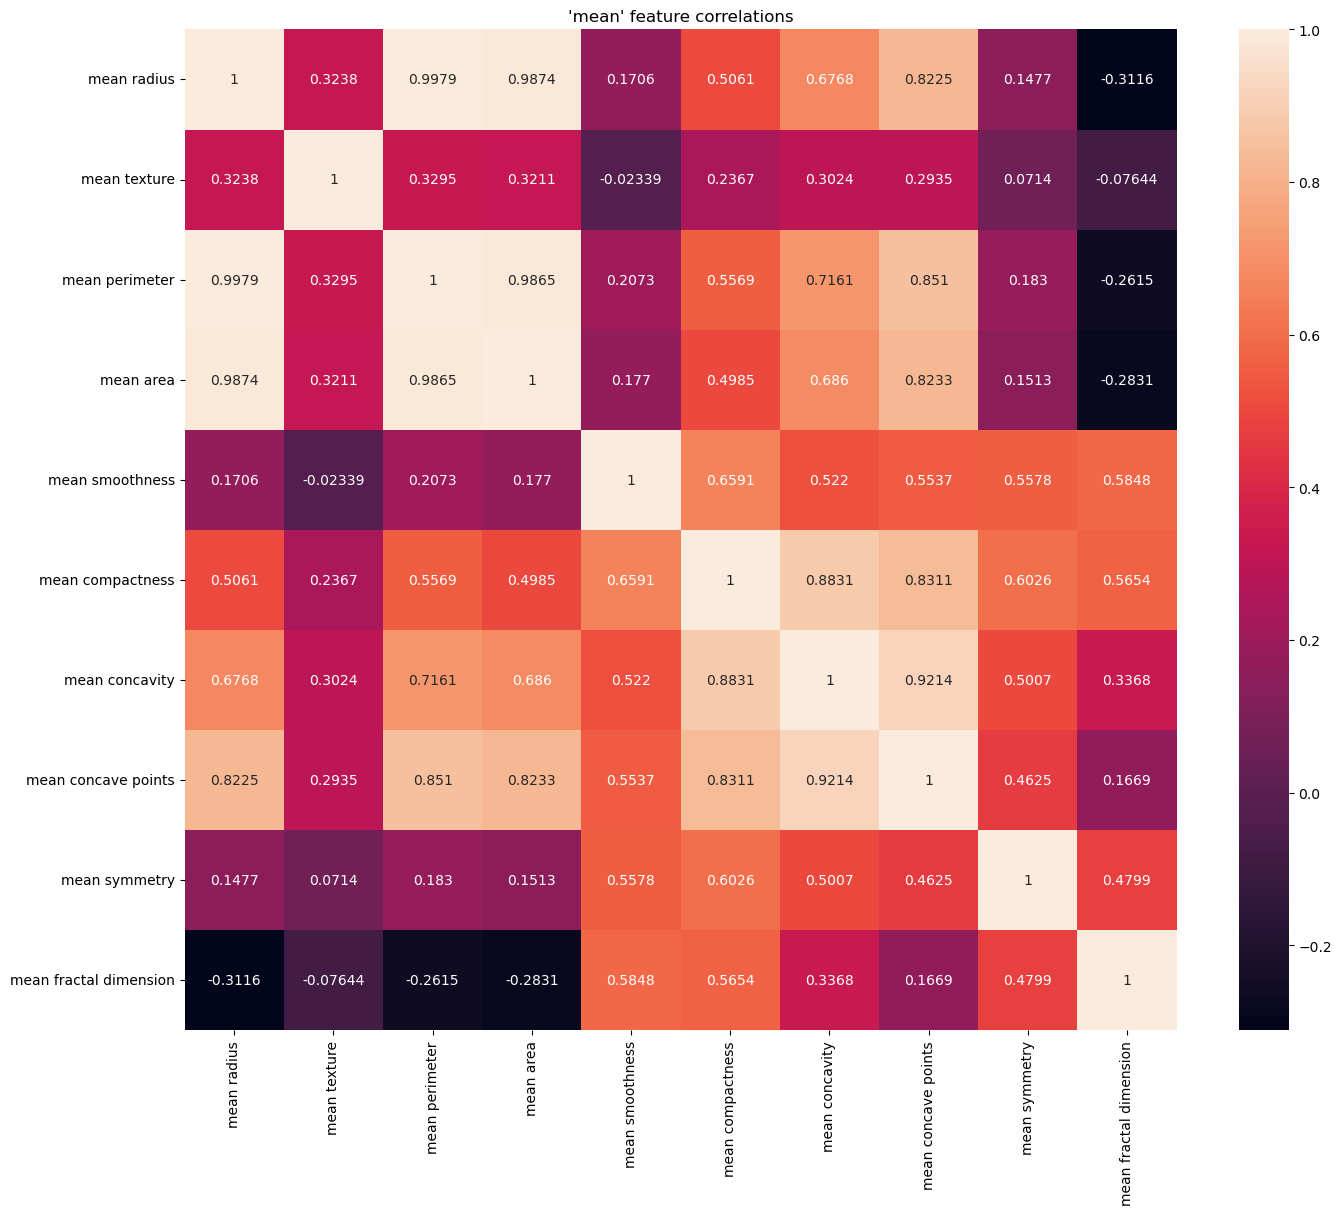

In [7]:
#Heat map for correlations between "mean" features
correlations_mean_var = X.iloc[:,0:10].corr(method='pearson')
plt.figure(figsize=(16, 13))
sns.heatmap(correlations_mean_var,annot = True,fmt=".4g")
plt.title("'mean' feature correlations")

Considering only correlations of 0.9 and above, we can see that features "mean radius", "mean perimeter" and "mean area" are all strongly positively correlated, having correlations with each other up to 0.99. "Mean concavity" also shows a correlation of 0.9214 with "mean concave points".

To confirm these correlations, we will plot the features against each other. Each instance will also be coloured based on their class to see if the features have a high degree in separating the classes:

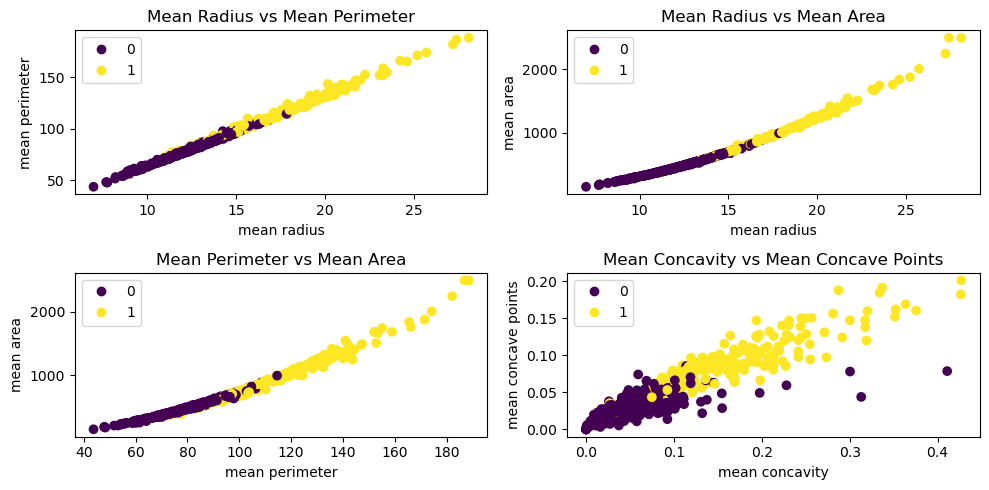

In [8]:
ax =plt.figure(figsize=(10,5))
#mean radius vs mean perimeter
plt.subplot(2,2,1)
plt.title("Mean Radius vs Mean Perimeter")
plot_1 = plt.scatter(X["mean radius"],X["mean perimeter"],c=y["class"])
plt.legend(handles=plot_1.legend_elements()[0], labels=['0','1'])
plt.xlabel("mean radius")
plt.ylabel("mean perimeter")

#mean radius vs mean area
plt.subplot(2,2,2)
plt.title("Mean Radius vs Mean Area")
plot_2 = plt.scatter(X["mean radius"],X["mean area"],c=y["class"])
plt.legend(handles=plot_2.legend_elements()[0], labels=['0','1'])
plt.xlabel("mean radius")
plt.ylabel("mean area")

#mean perimeter vs mean area
plt.subplot(2,2,3)
plt.title("Mean Perimeter vs Mean Area")
plot_3 = plt.scatter(X["mean perimeter"],X["mean area"],c=y["class"])
plt.legend(handles=plot_3.legend_elements()[0], labels=['0','1'])
plt.xlabel("mean perimeter")
plt.ylabel("mean area")

#mean concavity vs mean concave points
plt.subplot(2,2,4)
plt.title("Mean Concavity vs Mean Concave Points")
plot_4 = plt.scatter(X["mean concavity"],X["mean concave points"],c=y["class"])
plt.legend(handles=plot_4.legend_elements()[0], labels=['0','1'])
plt.xlabel("mean concavity")
plt.ylabel("mean concave points")

ax.tight_layout()

The high correlation found between the "mean" features from the heat maps is reflected by the graphs above which show all show a strong linear relationship. Furthermore, we can see that when plotting colours based on class, all features have a high capability in distinguishing classes, where high values in "mean area", "mean radius", "mean perimeter", "mean concavity" and "mean concave points" result in a higher proportion of class 1 (malignant) and vice versa for class 0 (benign). 

Given the high correlation seen between "mean radius", "mean perimeter" and "mean area", and high correlation between "mean concavity" and "mean concave points, we can keep any one of the correlated variables. For this case, we will keep "mean radius" and "mean concave points".

### 2.2 "Error" feature correlations

Using pearsons coefficient, we will now compute the correlations between all 'error' variables in the dataset. Correlations will be displayed in a heatmap below, with lighter colours indicating strong positive correlation, and darker colours indicating strong negative correlation

Text(0.5, 1.0, "'error' feature correlations")

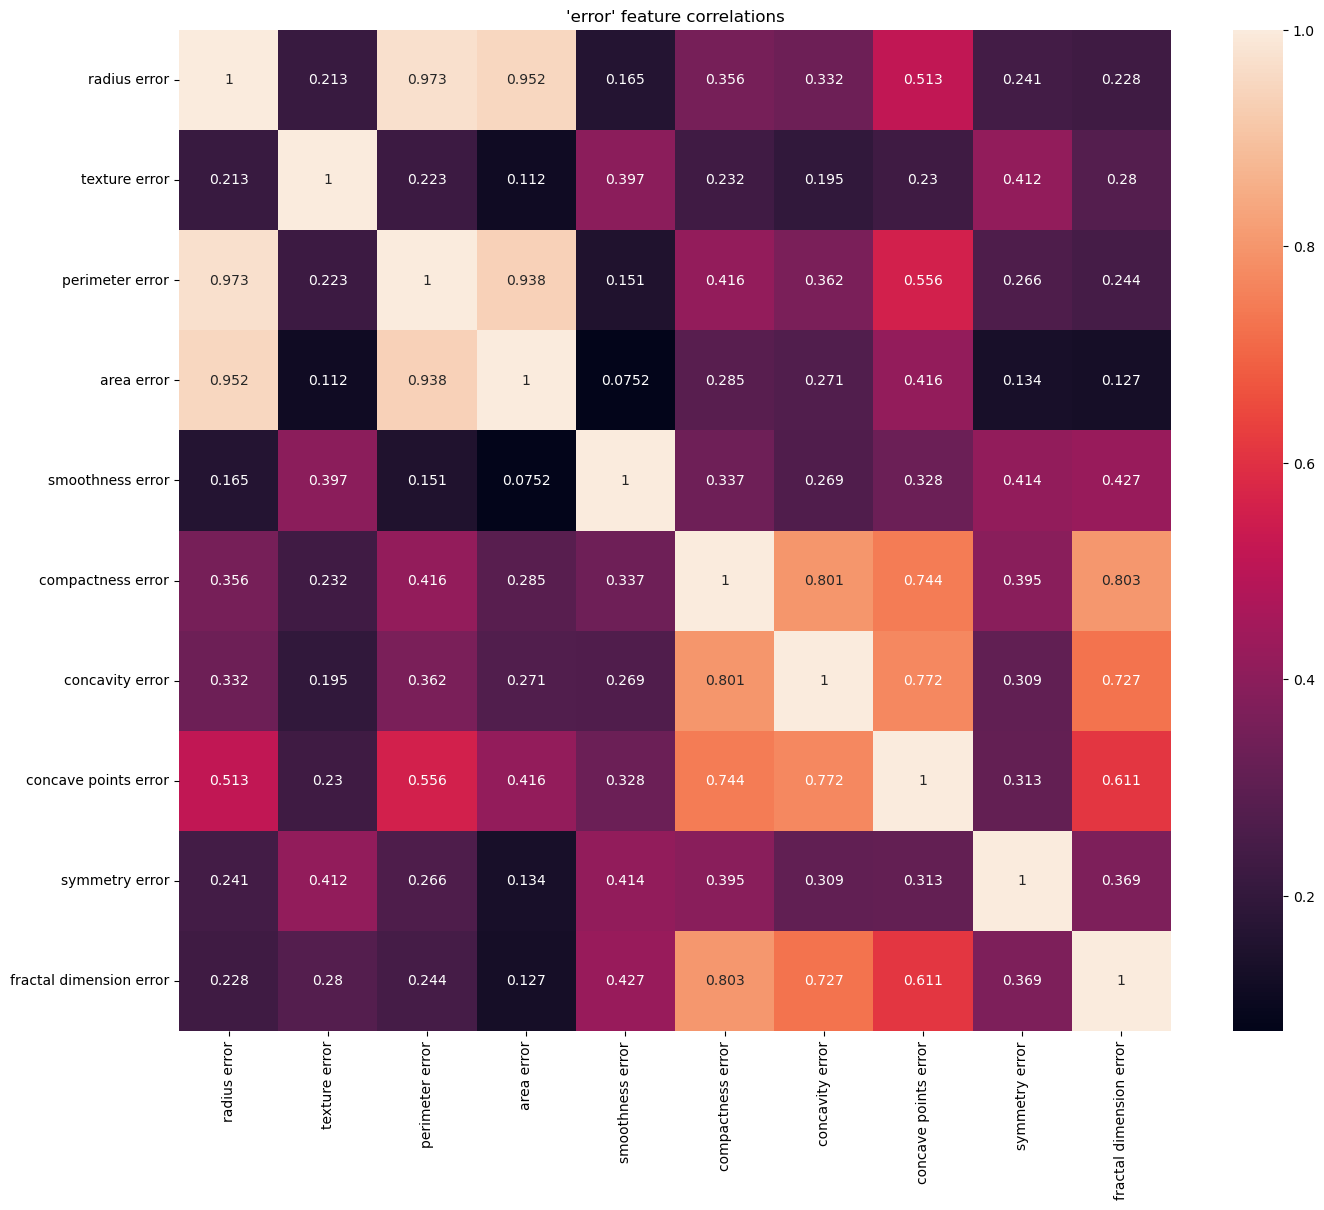

In [9]:
#Heat map for correlations between "error" features
correlations_error_var = X.iloc[:,10:20].corr(method='pearson')
plt.figure(figsize=(16, 13))
sns.heatmap(correlations_error_var,annot = True,fmt=".3g")
plt.title("'error' feature correlations")

Considering only correlations of 0.9 and above, we can see that features "radius error", "perimeter error" and "area error" are all strongly positively correlated, having correlations with each other > 0.9. 

To confirm these correlations, we will plot the features against each other. Each instance will also be coloured based on their class to see if the features have a high degree in separating the classes:

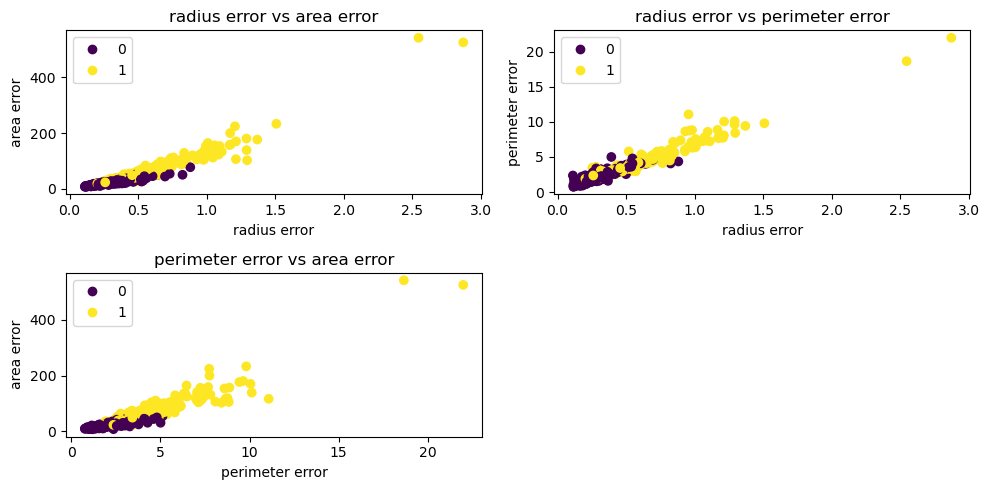

In [10]:
ax =plt.figure(figsize=(10,5))
#radius error vs area error
plt.subplot(2,2,1)
plot_1 = plt.scatter(X["radius error"],X["area error"],c=y["class"])
plt.legend(handles=plot_1.legend_elements()[0], labels=['0','1'])
plt.xlabel("radius error")
plt.ylabel("area error")
plt.title("radius error vs area error")

#radius error vs perimiter error
plt.subplot(2,2,2)
plot_2 = plt.scatter(X["radius error"],X["perimeter error"],c=y["class"])
plt.legend(handles=plot_2.legend_elements()[0], labels=['0','1'])
plt.xlabel("radius error")
plt.ylabel("perimeter error")
plt.title("radius error vs perimeter error")

#perimeter error vs area error
plt.subplot(2,2,3)
plot_3 = plt.scatter(X["perimeter error"],X["area error"],c=y["class"])
plt.legend(handles=plot_3.legend_elements()[0], labels=['0','1'])
plt.xlabel("perimeter error")
plt.ylabel("area error")
plt.title("perimeter error vs area error")

ax.tight_layout()

The high correlation found between the "error" features from the heat maps is reflected by the graphs above which show a strong linear relationship between the features. Furthermore, we can see that "radius error", "perimeter error", and "area error" have a high capability in distinguishing classes where high values in these features all result in a higher proportion of class 1 (malignant) and vice versa for class 0 (benign). 

Considering the high correlation between some of the "error" features,we should keep only 1 feature between "radius error", "perimiter error" and "area error". In this we case, we will keep "radius error" since we also kept "mean radius".

### 2.3 "Worst" feature correlations

Using pearsons coefficient, we will now compute the correlations between all 'worst' variables in the dataset. Correlations will be displayed in a heatmap below, with lighter colours indicating strong positive correlation, and darker colours indicating strong negative correlation

Text(0.5, 1.0, "'worst' feature correlations")

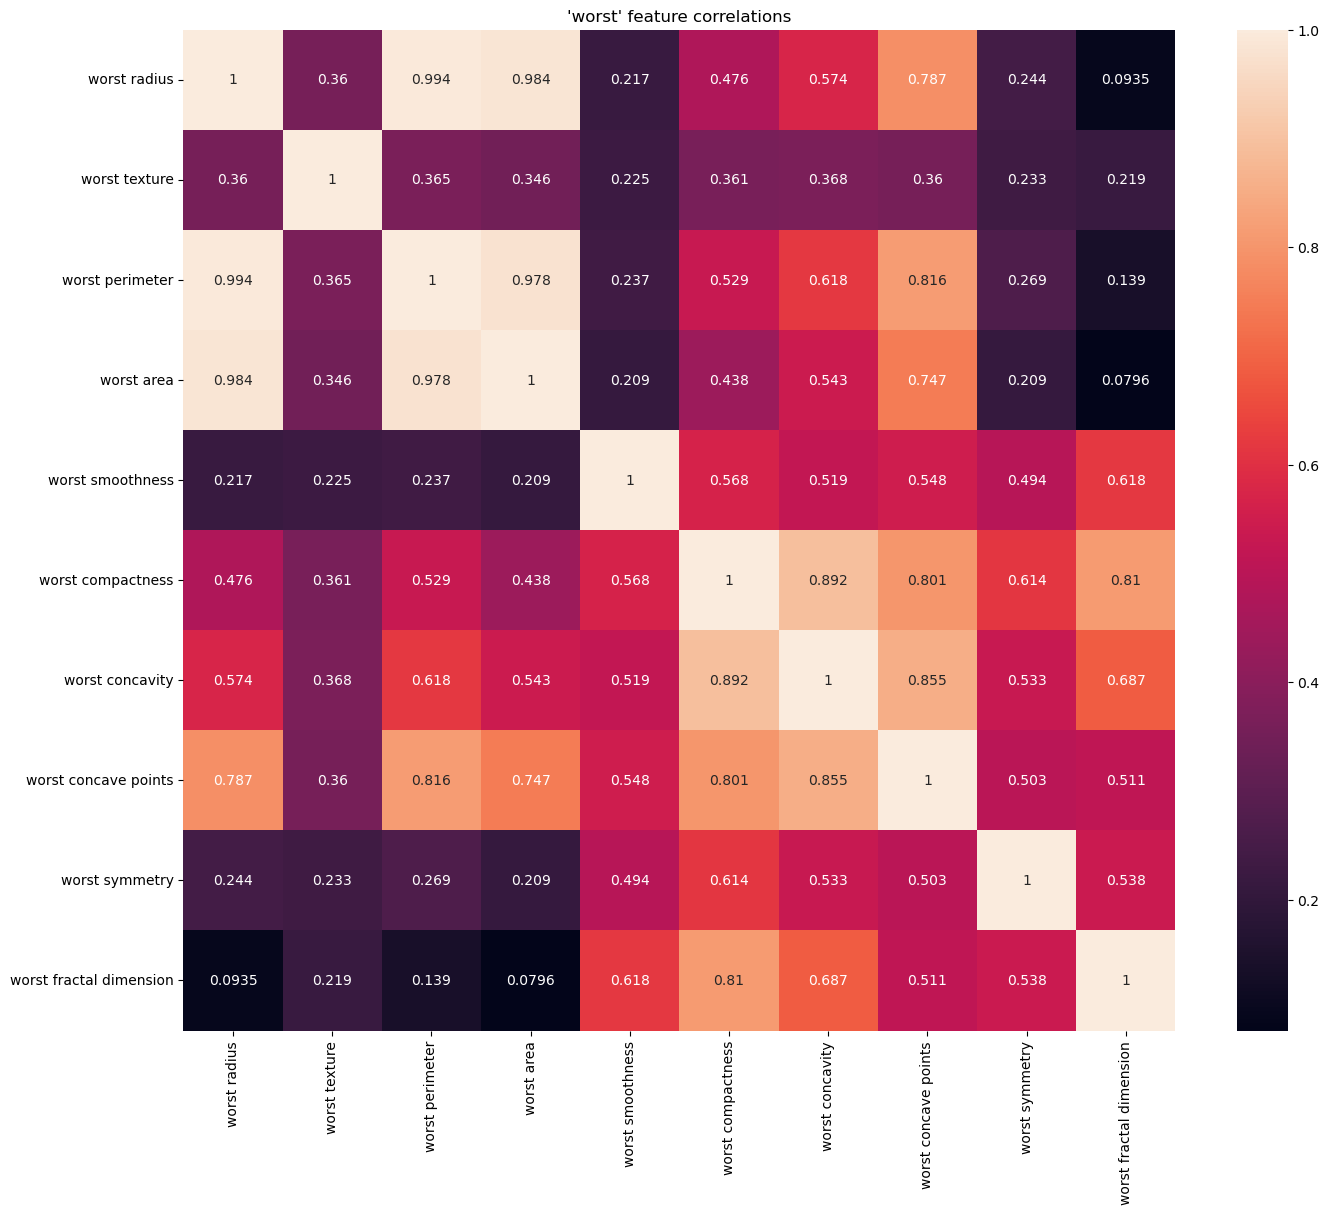

In [11]:
#Heat map for correlations between "worst" features
correlations_worst_var = X.iloc[:,20:30].corr(method='pearson')
plt.figure(figsize=(16, 13))
sns.heatmap(correlations_worst_var,annot = True,fmt=".3g")
plt.title("'worst' feature correlations")

Considering only correlations of 0.9 and above, we can see that features "worst radius", "worst perimeter" and "worst area" are all strongly positively correlated, having correlations with each other up to 0.99. 

To confirm these correlations, we will plot the features against each other. Each instance will also be coloured based on their class to see if the features have a high degree in separating the classes:

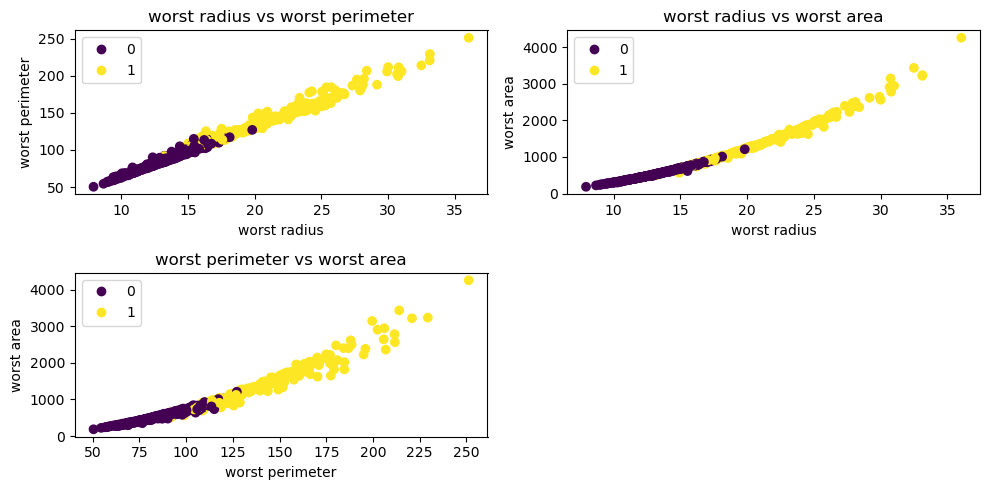

In [12]:
ax =plt.figure(figsize=(10,5))
#worst radius vs worst perimeter
plt.subplot(2,2,1)
plot_1 = plt.scatter(X["worst radius"],X["worst perimeter"],c=y["class"])
plt.legend(handles=plot_1.legend_elements()[0], labels=['0','1'])
plt.xlabel("worst radius")
plt.ylabel("worst perimeter")
plt.title("worst radius vs worst perimeter")

#worst radius vs worst area
plt.subplot(2,2,2)
plot_2 = plt.scatter(X["worst radius"],X["worst area"],c=y["class"])
plt.legend(handles=plot_2.legend_elements()[0], labels=['0','1'])
plt.xlabel("worst radius")
plt.ylabel("worst area")
plt.title("worst radius vs worst area")

#worst perimeter vs worst area
plt.subplot(2,2,3)
plot_3 = plt.scatter(X["worst perimeter"],X["worst area"],c=y["class"])
plt.legend(handles=plot_3.legend_elements()[0], labels=['0','1'])
plt.xlabel("worst perimeter")
plt.ylabel("worst area")
plt.title("worst perimeter vs worst area")

ax.tight_layout()

The high correlation found between the "worst" features from the heat maps is reflected by the graphs above which show a relatively strong linear relationship between the features. Furthermore, we can see that all values of the features have a relatively high capability in distinguishing classes, with higher values mostly indicating class 1, and lower values mostly indicating class 0. 

Considering the high correlation between some of the "worst" features, we should keep only 1 feature between "worst radius", "worst perimeter" and "worst area". For this project, we will keep "worst radius".

### 2.4 Dropping features based on correlation

As found in 2.3, we will drop the variables "worst perimeter", "worst area", "area error", "perimeter error", "mean perimeter", "mean area" and "mean concavity" will be dropped due to high correlation. The datasets will then be split into training and test sets with a 85/15 split.

In [13]:
X_dropped = X.drop(["worst perimeter", "worst area","area error",
                    "perimeter error", "mean perimeter","mean area", "mean concavity"],axis=1)

#Split between train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_dropped,y,test_size=0.15, random_state=123) 

# 3. Model Training

### Task 3. Investigating decision tree classifiers

In this section, we will investigate the performance of decision tree classifiers for classifying breast cancer using varying hyperparameters. In particular, we will look at the hyperparameters:

<b>max_depth:</b> Determines the maximum depth the decision tree can grow to
<br><b>min_samples_leaf:</b>  Determines the minimum samples a leaf node has to have
<br><b>min_samples_split:</b> Determines the minimum samples a leaf node has to have before splitting

### 3.1 Decision tree with default hyperparameters

We will first train a decision tree using default hyperparameters and evaluate its performance on the training and test datasets. By default, sklearn sets max_depth, min_samples_leaf and min_samples_split to None, 1 and 2 respectively. These values effectively apply no restrictions to the tree during training.

In [14]:
#Training a tree with default Hyperparameters:
tree_default = DecisionTreeClassifier(random_state=123)
tree_default.fit(X_train,y_train)

#Predict classes on training and test sets
tree_default_train_pred = tree_default.predict(X_train)
tree_default_test_pred =  tree_default.predict(X_test)

#Display results
print("Training set accuracy:")
print(accuracy_score(tree_default_train_pred,y_train))

print("\nTest set accuracy:")
print(accuracy_score(tree_default_test_pred,y_test))

Training set accuracy:
1.0

Test set accuracy:
0.9302325581395349


As above, the decision tree attained an accuracy of 100% on the training set and an accuracy of 93% on the test set. There is a high chance that the model overfitting the training set as no restrictions has been placed on the tree. An accuracy of 100% indicates that the decision tree has fit to the training data too well with high variance, and therefore will not generalise well to new data. This is reflected by the decrease in accuracy seen in the test set.

To confirm this, we can look at the deicison tree graph for the training set below:

-----------------------------------------------Default Training set Decision tree:-------------------------------------------


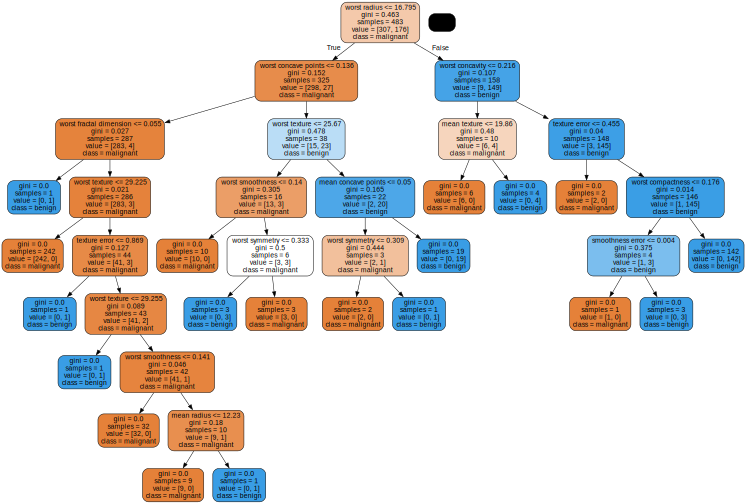

In [15]:
#Displaying decision tree and its nodes using graphviz
path = os.path.abspath("default_tree.dot")
graph = export_graphviz(
        tree_default,
        feature_names=list(X_dropped.columns),
        class_names=["malignant","benign"],
        rounded=True,
        filled=True,
        max_depth=10
    )
print("-----------------------------------------------Default Training set Decision tree:-------------------------------------------")
pydot_graph = pydotplus.graph_from_dot_data(graph)
pydot_graph.set_size('"14,7"')
Source(pydot_graph.to_string())


The visual representation of the decision tree above confirms that the decision tree is overfitting the test data. Looking at only the leaf nodes of the tree, we can see that there are multiple leaf nodes which have a single instance/sample, and furthermore all leaf nodes having a gini impurity of 0. As there is no regularisation or restrictions on the tree, the tree is continuously splitting instances until a gini impurity of 0 is achieved (subsequently giving 100% classification accuracy), and therefore overfitting the training dataset.

### 3.2 Decision Tree with max depth = 3

We will now train a decision tree with max_depth = 3 and evaluate its performance on the training and test sets. Setting a max depth of 3 will prevent the tree from expanding any nodes past a depth of 3, and therefore prevent any overfitting.

In [16]:
#Training a tree with max depth 3
tree_max_depth = DecisionTreeClassifier(max_depth=3,random_state=123)
tree_max_depth.fit(X_train,y_train)

#Classify training and test set
tree_max_depth_train_pred = tree_max_depth.predict(X_train)
tree_max_depth_test_pred =  tree_max_depth.predict(X_test)

#Print results
print("Training set accuracy:")
print(accuracy_score(tree_max_depth_train_pred,y_train))

print("\n Test set accuracy:")
print(accuracy_score(tree_max_depth_test_pred,y_test))

Training set accuracy:
0.9813664596273292

 Test set accuracy:
0.9534883720930233


Compared to default decision tree, the training set accuracy has decreased from 100% to 98%. The test set accuracy however has increased from 94% to 95%, indicating that it generalises to new and unseen data a bit better. Setting a max depth of 3 has prevented the tree from continuously splitting instances until a gini impurity of 0 is reached (i.e 100% classification accuracy) and therefore preventing overfitting on the training set. As a result, it is expected that the training set accuracy has decreased. Subsequently, it was also expected for the test set accuracy to increase as the tree now overfits the training set less, and therefore should generalise to new data better.

<br>

Let's have a look at the training decision tree graph and see how the hyperparameter max_depth = 3 effected the tree and it's decisions during training. 

-----------------------------------------------max_depth = 3 Training Set Decision tree:-------------------------------------------


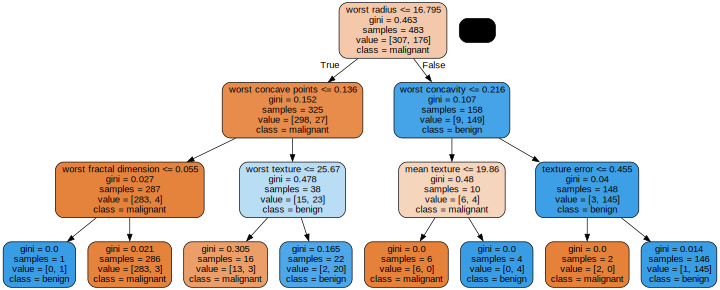

In [17]:
#Displaying decision tree and its nodes
ath = os.path.abspath("tree_max_depth.dot")
graph = export_graphviz(
        tree_max_depth,
        feature_names=list(X_dropped.columns),
        class_names=["malignant","benign"],
        rounded=True,
        filled=True,
        max_depth=10
    )

print("-----------------------------------------------max_depth = 3 Training Set Decision tree:-------------------------------------------")
pydot_graph = pydotplus.graph_from_dot_data(graph)
pydot_graph.set_size('"10,7"')
Source(pydot_graph.to_string())

Setting the hyperparameter max_depth = 3 resulted in the tree having a maximum depth of 3 and no further splits pass that depth. As a result, compared to the default hyperparameter tree, there are much less leaf nodes with exactly 0 for gini impurity (and therefore less overfitting). As mentioned before, it is therefore expected for the decision tree to perform a bit worse on the training set as the tree is now constrained to a depth of 3.

### 3.3 Decision Tree with min_samples_split = 5

We will now train a decision tree with min_samples_split = 5 and evaluate its performance on the training and test sets. Setting min_samples_split = 5 will prevent the tree from expanding any nodes which have less than 5 samples. As such, we should expect to the removal of leaf nodes where a split was made with samples < 5 in the default tree. Depending how many splits were made this way in the default tree, this may reduce overfitting.

In [18]:
#Training a tree with min_samples_split=5
tree_min_split = DecisionTreeClassifier(min_samples_split=5,random_state=123)
tree_min_split.fit(X_train,y_train)


#Classify training and test set
tree_min_split_train_pred = tree_min_split.predict(X_train)
tree_min_split_test_pred =  tree_min_split.predict(X_test)

#Print results
print("Training set accuracy:")
print(accuracy_score(tree_min_split_train_pred,y_train))

print("\n Test set accuracy:")
print(accuracy_score(tree_min_split_test_pred,y_test))

Training set accuracy:
0.9958592132505176

 Test set accuracy:
0.9302325581395349


Using min_samples_split = 5, there has been a slight decrease in training set accuracy compared to the default decision tree with accuracy of 100%. The testing set accuracy however has not changed from the default tree's accuracy of 93%. Furthermore, as the training set accuracy is still very high, the decision tree is likely still overfitting. When compared to setting a max depth of 3, the decision tree with min_samples_split = 5 also performs worse on the test set (93% vs 95%). As such, it does not seem that setting min_samples_split = 5 has made a large effect on the overfitting problem.

We can confirm this by looking at the decision tree graph for the training set:

-------------------------------------------min_samples_split = 5 Training Set Decision tree:--------------------------------------


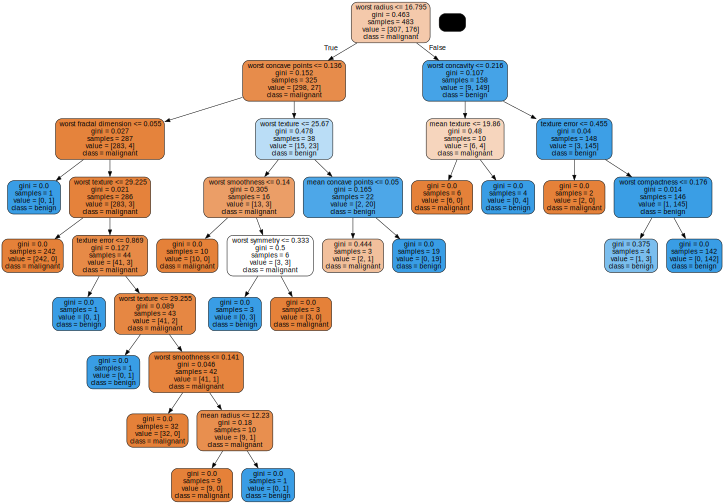

In [19]:
#Displaying decision tree and its nodes
path = os.path.abspath("tree_min_split.dot")
graph = export_graphviz(
        tree_min_split,
        feature_names=list(X_dropped.columns),
        class_names=["malignant","benign"],
        rounded=True,
        filled=True,
        max_depth=10
    )

print("-------------------------------------------min_samples_split = 5 Training Set Decision tree:--------------------------------------")
pydot_graph = pydotplus.graph_from_dot_data(graph)
pydot_graph.set_size('"14,7"')
Source(pydot_graph.to_string())

Using min_samples_split = 5, the decision tree only splits at nodes where there are a minimum of 5 samples. When comparing to the default decision tree however, this seems to only have resulted in the tree having two less splits/leaf nodes, indicating that the tree may is still overfitting the training dataset, and more/stronger contraints to the tree will need to be applied.

### 3.4 Decision Tree with min_samples_leaf = 5

We will now train a decision tree with min_samples_leaf = 5 and evaluate its performance on the training and test sets. Setting a min_samples_leaf = 5 will prevent the tree from expanding any nodes if it results in a leaf node with less than 5 samples. As such, this will hopefully prevent the tree from splitting at certain nodes and therefore stop overfitting.

In [20]:
#Training a tree with min_samples_leaf=5
tree_min_leaf = DecisionTreeClassifier(min_samples_leaf=5,random_state=123)
tree_min_leaf.fit(X_train,y_train)


#Classify training and test set
tree_min_leaf_train_pred = tree_min_leaf.predict(X_train)
tree_min_leaf_test_pred =  tree_min_leaf.predict(X_test)

#Print results
print("Training set accuracy:")
print(accuracy_score(tree_min_leaf_train_pred,y_train))

print("\n Test set accuracy:")
print(accuracy_score(tree_min_leaf_test_pred,y_test))

Training set accuracy:
0.9730848861283644

 Test set accuracy:
0.9534883720930233


Using min_samples_leaf = 5, there has been a slight decrease of ~3% in training set accuracy compared to the default decision tree with accuracy of 100%. Furthermore a test set accuracy of 95% indicates that it generalises a bit better to unseen data compared to the default tree and min_samples_split = 3 tree which both achieved 93% testing set accuracy. It's performance on the test set is also comparable to the tree with max_depth = 3 tree which also achieved an accuracy of 95%. As such, setting min_samples_leaf = 5 must have resulted in removal of some leaf nodes/splits made in the default tree and therefore prevented overfitting.

Let's have a look at the decision tree on the training set to confirm this:

-----------------------------------------------min_samples_leaf = 5 Training Decision tree:-------------------------------------------


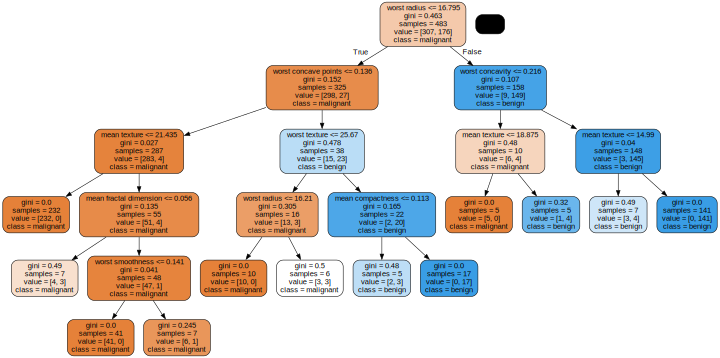

In [21]:
#Displaying decision tree and its nodes
path = os.path.abspath("tree_min_leaf.dot")
graph = export_graphviz(
        tree_min_leaf,
        feature_names=list(X_dropped.columns),
        class_names=["malignant","benign"],
        rounded=True,
        filled=True,
        max_depth=10
    )
print("-----------------------------------------------min_samples_leaf = 5 Training Decision tree:-------------------------------------------")
pydot_graph = pydotplus.graph_from_dot_data(graph)
pydot_graph.set_size('"10,6"')
Source(pydot_graph.to_string())

Setting min_samples_leaf = 5 resulted in the decision tree keeping only leaf nodes with at least 5 samples. This resulted in the resulting tree having less leaf nodes and splits than seen in the default tree and therefore resulting in less overfitting. The effect of the constraint however is less stronger compared to setting max_depth = 3, but stronger compared to setting min_samples_split (which only removed 2 leaf nodes).

### 3.5 Decision Tree with grid search for hyperparameters

Now that we have tested out various values for max_depth, min_samples_split and min_samples_leaf, we will now run a grid search to determine the best combination of max_depth, min_samples_split and min_samples_leaf values that will produce the best training score. 3-fold cross-validation will be used so that we can effectively test the models ability to predict unseen data (using validation sets).

In [22]:
tree_grid = DecisionTreeClassifier(random_state=123)
parameters = {'max_depth':[i for i in range(1,10)],'min_samples_split':[2,3,4,5,10,20,30,40,50],
              'min_samples_leaf':[1,2,3,4,5,10,20,30,40,50]}

#Perform grid search on knn model with 3-fold cross validation on training set
grid_search = GridSearchCV(tree_grid, parameters,cv=3,scoring='accuracy')
grid_search.fit(X_train, y_train)

print("-------------------------------Grid Search Results:----------------------------------------")
pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),
           pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values(by="Accuracy")

-------------------------------Grid Search Results:----------------------------------------


,max_depth,min_samples_leaf,min_samples_split,Accuracy
0,1,1,2,0.904762
357,4,50,30,0.904762
356,4,50,20,0.904762
355,4,50,10,0.904762
354,4,50,5,0.904762
...,...,...,...,...
631,8,1,3,0.944099
630,8,1,2,0.944099
272,4,1,4,0.944099
541,7,1,3,0.944099


A grid search was performed on the hyperparameters max_depth, min_samples_split, and min_samples_leaf over the values [1,2,3,4,5,6,7,8,9], [2,3,4,5,6,10,20,30,40,50] and [1,2,3,4,5,10,20,30,40,50] respectively. Compared to using values of 3,5 and 5 for max_depth, min_samples_leaf, and min_samples_split individually, the grid search found that using less constraining values for max_depth, min_samples_leaf, and min_samples_split produced the best cross-validation accuracy. In particular, the values of 6, 1, and 4 for max_depth, min_samples_leaf, and min_samples_split were found to be optimal. Using 3-fold cross-validation, these parameters achieved the best mean accuracy of 0.942.

In [23]:
#Train a decision tree with the optimal parameters found above
final_tree = DecisionTreeClassifier(max_depth=6,min_samples_leaf=1,min_samples_split=4,random_state=123)
final_tree.fit(X_train,y_train)

#Classify training and test sets using optimal tree
final_tree_train_pred = final_tree.predict(X_train)
final_tree_test_pred = final_tree.predict(X_test)

### 3.6 Results Comparison

We will now compare thhe performances of all the tree classifiers created above with regards to classifying malignant and benign tumours. Lets first look at the confusion matrices of each of the classifiers for the both the training and test sets.

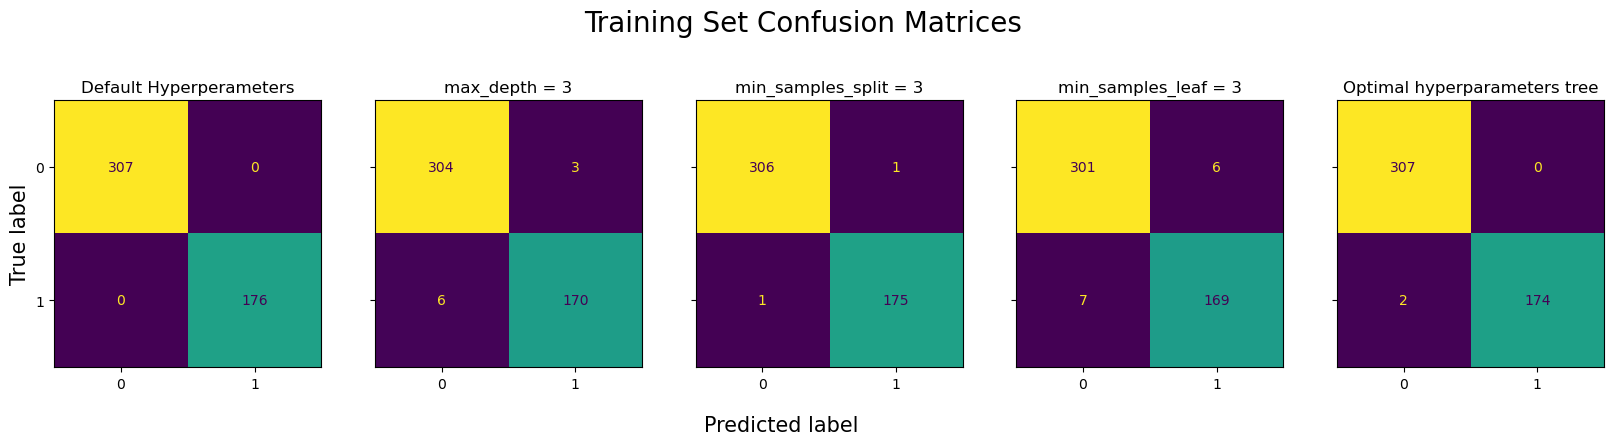

In [24]:
#Put models and model names in a list to loop through and plot their confusion matrices
classifiers = [("Default Hyperperameters",tree_default),("max_depth = 3", tree_max_depth),
              ("min_samples_split = 3", tree_min_split),("min_samples_leaf = 3", tree_min_leaf),
              ("Optimal hyperparameters tree",final_tree)]

#intialise plot
f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

#Loop through classifiers and plot their confusion matrices for their training and test set predictions
for i in range(len(classifiers)):
    y_pred = classifiers[i][1].predict(X_train)
    conf_mat = confusion_matrix(y_train, y_pred)
    graph = ConfusionMatrixDisplay(conf_mat,
                                  display_labels=(0,1))
    graph.plot(ax=axes[i])
    graph.ax_.set_title(classifiers[i][0])
    graph.im_.colorbar.remove()
    graph.ax_.set_xlabel('')
    if i!=0:
        graph.ax_.set_ylabel('')
    else:
        graph.ax_.set_ylabel('True label',fontsize=15)

f.text(0.45, 0.1, 'Predicted label',fontsize=15)


f.text(0.39, 0.9, 'Training Set Confusion Matrices',fontsize=20)
plt.show()

For the default hyperparameters decision tree, we can see  that it correctly classified all class 0 and 1 classes on the training set. As mentioned prior, this is clearly overfitting the training set since the tree has no constraints  or restrictions during training. 

Both the optimal hyperparameters and min_samples_split = 3 tree perform the next best, classifying 2 instances incorrectly. The optional hyperparameters tree has lighter constraints (with max_depth = 6, min_samples_leaf = 1 and min_samples_split = 4) compared to the other classifiers (not including the default tree), and therefore it is expected that the optimal tree would have somewhat better performance than the others on the training set. This however, also presents the risk of the optimal hyperparameters tree possibly overfitting to the training set and performing worse on the test set.

Finally, the max_depth =3 followed by the min_samples_leaf = 3 trees perform the worst, classifying 9 and 13 instances wrong, respectively. As seen in the decision tree graphs in section 3.6, these hyperparameter values had a far greater impact in the pruning effect of the tree, resulting in less splits/leaf nodes compared to the default tree. As a result, the tree fits less strongly to the training set, and therefore it is expected for the training set performance to also decrease.

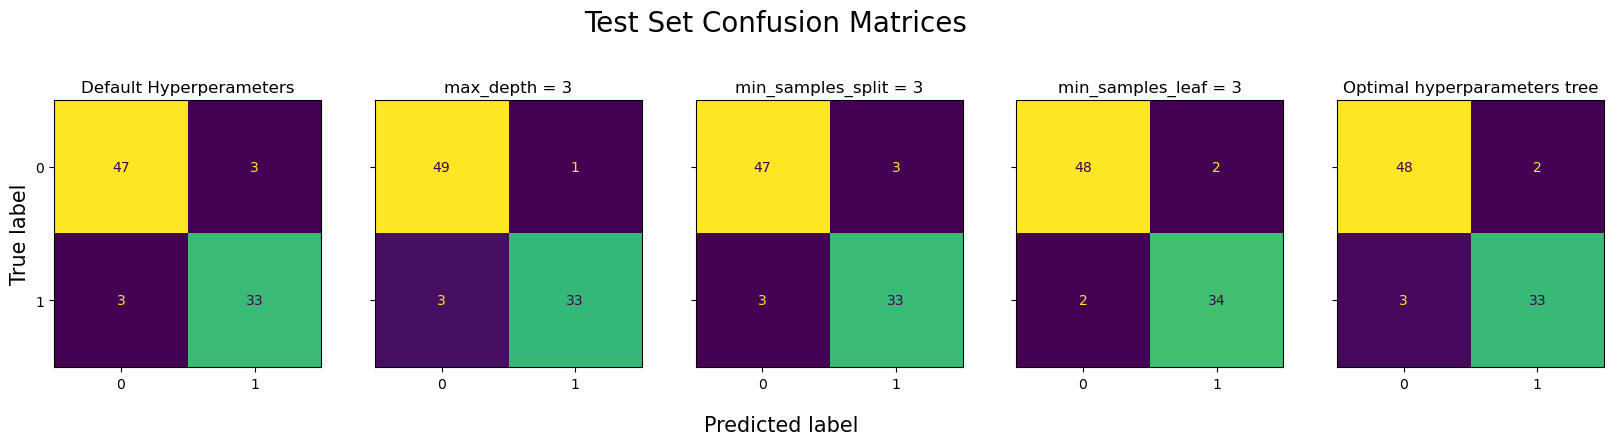

In [25]:
#intialise plot
f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

#Loop through classifiers and plot their confusion matrices for their training and test set predictions
for i in range(len(classifiers)):
    y_pred = classifiers[i][1].predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    graph = ConfusionMatrixDisplay(conf_mat,
                                  display_labels=(0,1))
    graph.plot(ax=axes[i])
    graph.ax_.set_title(classifiers[i][0])
    graph.im_.colorbar.remove()
    graph.ax_.set_xlabel('')
    if i!=0:
        graph.ax_.set_ylabel('')
    else:
        graph.ax_.set_ylabel('True label',fontsize=15)

f.text(0.45, 0.1, 'Predicted label',fontsize=15)


f.text(0.39, 0.9, 'Test Set Confusion Matrices',fontsize=20)
plt.show()

Looking at the test set confusion matrices, we can see that as expected, the default hyperparameters tree performs the worst, classiying 6 instances wrong. As it has overfit to the training set due to no training constraints, it generalises to unseen data much worse, resulting in a worse test set performance. The min_samples_split = 3 tree also performs the same as the default tree, incorrectly classifying 6 instances. As found in the graph for section 3.5, setting min_sample_leaf = 3 had very little pruning effect on the decision tree compared to the default tree, and therefore it is still overfitting. As such, it is expected for the min_samples_leaf = 3 tree to perform worse on the test set compared to the training set results.

The optimal hyperparameters tree performs the next worst, incorrectly classifying 5 instances wrong. As mentioned, the optimal hyperparameters tree(with max_depth = 6, min_samples_leaf = 1 and min_samples_split = 4) has much lighter constraints than the other 3 trees (not including the default tree) and as a result fitted to the training set much more well. While having a good performance on the training set, it seems this has however resulted in the tree not generalising to new data well in the test set compared to the other trees with tougher constraints(max_depth = 3 and min_samples_leaf = 3).

Finally the two best performing trees were the max_depth = 3 tree and the min_samples_leaf = 3 tree. As found in the graphs for section 3.5, the effect of these hyperparameters had a stronger pruning effect on the decision trees in the training set. While this resulted in relatively poorer training set results, it meant that these trees did not over fit the training set, and therefore resulting in better test set performance.



In the context of this dataset however, as we want to detect as many individuals with malginant tumours as possible, recall should be our priority before accuracy and precision (both are still important however). Below, we will look at the recall and precision of each of the classifiers

In [26]:
#Calculating precision and recall for training and test sets for decision trees created above.

#Default decision tree
default_train_recall = round(recall_score(y_pred = tree_default_train_pred, y_true = y_train),3)
default_test_recall  = round(recall_score(y_pred = tree_default_test_pred, y_true = y_test),3)
default_train_precision = round(precision_score(y_pred = tree_default_train_pred, y_true = y_train),3)
default_test_precision = round(precision_score(y_pred = tree_default_test_pred, y_true = y_test),3)

max_depth_train_recall = round(recall_score(y_pred = tree_max_depth_train_pred, y_true = y_train),3)
max_depth_test_recall =  round(recall_score(y_pred = tree_max_depth_test_pred, y_true = y_test),3)
max_depth_train_precision = round(precision_score(y_pred = tree_max_depth_train_pred, y_true = y_train),3)
max_depth_test_precision = round(precision_score(y_pred = tree_max_depth_test_pred, y_true = y_test),3)

min_split_train_recall = round(recall_score(y_pred = tree_min_split_train_pred, y_true = y_train),3)
min_split_test_recall =  round(recall_score(y_pred = tree_min_split_test_pred, y_true = y_test),3)
min_split_train_precision = round(precision_score(y_pred = tree_min_split_train_pred, y_true = y_train),3)
min_split_test_precision = round(precision_score(y_pred = tree_min_split_test_pred, y_true = y_test),3)

min_leaf_train_recall = round(recall_score(y_pred = tree_min_leaf_train_pred, y_true = y_train),3)
min_leaf_test_recall = round(recall_score(y_pred = tree_min_leaf_test_pred, y_true = y_test),3)
min_leaf_train_precision = round(precision_score(y_pred = tree_min_leaf_train_pred, y_true = y_train),3)
min_leaf_test_precision = round(precision_score(y_pred = tree_min_leaf_test_pred, y_true =  y_test),3)

final_tree_train_recall = round(recall_score(y_pred = final_tree_train_pred,y_true = y_train),3)
final_tree_test_recall = round(recall_score(y_pred = final_tree_test_pred,y_true = y_test),3)
final_tree_train_precision = round(precision_score(y_pred = final_tree_train_pred, y_true = y_train),3)
final_tree_test_precision = round(precision_score(y_pred = final_tree_test_pred,y_true = y_test),3)

print("\nDefault decision tree:")
print("Training set recall:    " + str(default_train_recall) + "     Test set recall:    " + str(default_test_recall))
print("Training set precision: " + str(default_train_precision) + "     Test set precision: " + str(default_test_precision))

print("\nDecision tree with max_depth = 3:")
print("Training set recall:    " + str(max_depth_train_recall) + "   Test set recall:    " + str(max_depth_test_recall))
print("Training set precision: " + str(max_depth_train_precision) + "   Test set precision: " + str(max_depth_test_precision))

print("\nDecision tree with min_samples_split = 5:")
print("Training set recall:    " + str(min_split_train_recall) + "   Test set recall:    " + str(min_split_test_recall))
print("Training set precision: " + str(min_split_train_precision) + "   Test set precision: " + str(min_split_test_precision))

print("\nDecision tree with min_samples_leaf = 5:")
print("Training set recall:    " + str(min_leaf_train_recall) + "    Test set recall:    " + str(min_leaf_test_recall))
print("Training set precision: " + str(min_leaf_train_precision) + "   Test set precision: " + str(min_leaf_test_precision))

print("\nDecision tree with min_samples_leaf = 1, max_depth=6 and min_samples_split = 4:")
print("Training set recall:    " + str(final_tree_train_recall) + "   Test set recall:    " + str(final_tree_test_recall))
print("Training set precision: " + str(final_tree_train_precision) + "     Test set precision: " + str(final_tree_test_precision))


Default decision tree:
Training set recall:    1.0     Test set recall:    0.917
Training set precision: 1.0     Test set precision: 0.917

Decision tree with max_depth = 3:
Training set recall:    0.966   Test set recall:    0.917
Training set precision: 0.983   Test set precision: 0.971

Decision tree with min_samples_split = 5:
Training set recall:    0.994   Test set recall:    0.917
Training set precision: 0.994   Test set precision: 0.917

Decision tree with min_samples_leaf = 5:
Training set recall:    0.96    Test set recall:    0.944
Training set precision: 0.966   Test set precision: 0.944

Decision tree with min_samples_leaf = 1, max_depth=6 and min_samples_split = 4:
Training set recall:    0.989   Test set recall:    0.917
Training set precision: 1.0     Test set precision: 0.943


As mentioned, we want to detect as much patients who have breast cancer as possible. Therefore there is more priority placed on recall and decreasing the number of false negatives( as well as increasing the number of true positives). When looking at the training sets, the default decision tree performs the best, having a recall of 1, followed by the min_samples_split = 5 tree with recall = 0.994, the grid_search parameters tree with recall = 0.989, the max_depth = 3 tree with recall = 0.966, and finally the min_samples_leaf = 5 tree with recall = 0.96. For the test set however, the min_samples_leaf= 5 tree performs the best, achieving a recall of 0.944, with the other 4 remaining trees all achieving a recall of 0.917.


# PART 2: Concrete Slump Test

# 1. Import and inspect data

This section of the project will work with the Concrete Slump Test dataset obtained from https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test. This task will be a regression task, with the aim to predict the <i>28-day Compressive Strength</i> of a concrete slump based on 7 input features mentioned in the data dictionary in the link provided.

We will first read in the Concrete Slump Test dataset and inspect it to confirm that the features are the same as those listed in the source website, and whether any preprocessing of data will be required (missing values e.t.c).

In [27]:
#Read in data
slump = pd.read_csv("slump_test.data")

We will now look at the first 4 rows of the dataset to have a rough understanding of the dataset's structure:

In [28]:
slump.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


From the head of the dataset, we can see that all variables except No are float. All required input variables and target variables are present ("Compressive Strength (28-day)(Mpa)"). The variable "No" however is not present in the list of input features mentioned in the source website, and therefore this variable will need to be dropped.

We can learn more about feature properties using the info method:

In [29]:
slump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  103 non-null    int64  
 1   Cement                              103 non-null    float64
 2   Slag                                103 non-null    float64
 3   Fly ash                             103 non-null    float64
 4   Water                               103 non-null    float64
 5   SP                                  103 non-null    float64
 6   Coarse Aggr.                        103 non-null    float64
 7   Fine Aggr.                          103 non-null    float64
 8   SLUMP(cm)                           103 non-null    float64
 9   FLOW(cm)                            103 non-null    float64
 10  Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB

Looking at the info of the slump dataset we can see that:
- There is no missing/non-null data
- All data is numerical, no one-hot-encoding will need to be performed


# 2. Data preparation

To see if any variables can be dropped before training, we first produce a pairwise plot of all input features. 

Text(0.5, 1.0, 'Input Feature Pairwise Relationships')

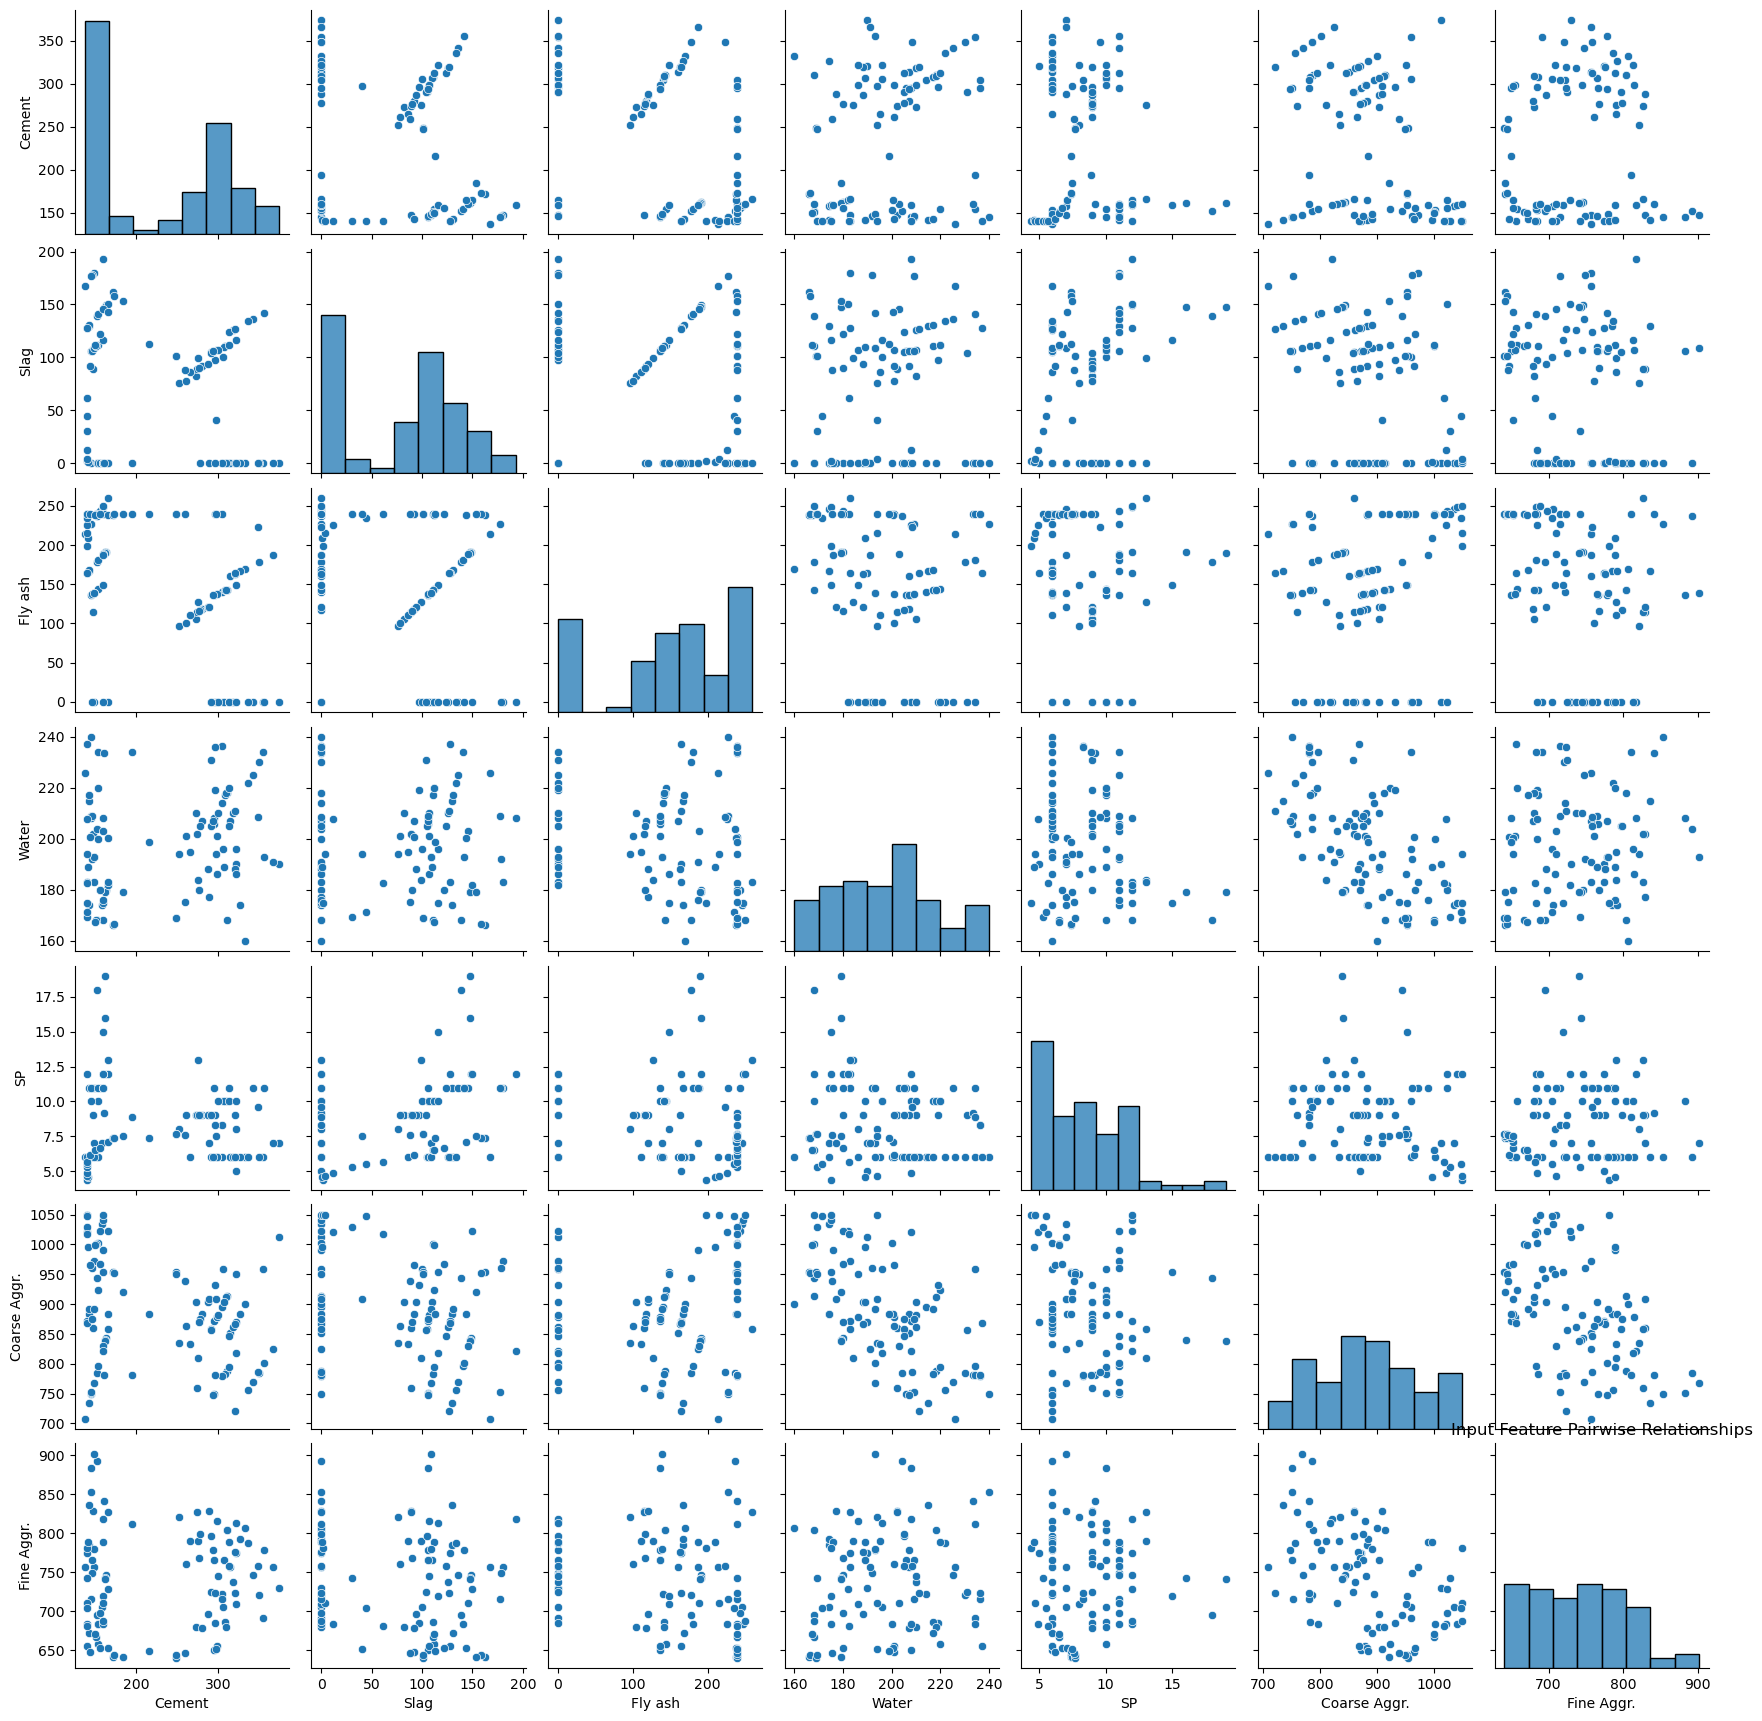

In [30]:
#Plot pairwise relationships between features
sns.pairplot(slump.iloc[:,1:8])
plt.title("Input Feature Pairwise Relationships")

From the pairwise plots, there does not seem to be any strong linear relationships between variables. We can confirm this with a heatmap of pearson correlations between variables as below:

Text(0.5, 1.0, 'Input Features Correlations')

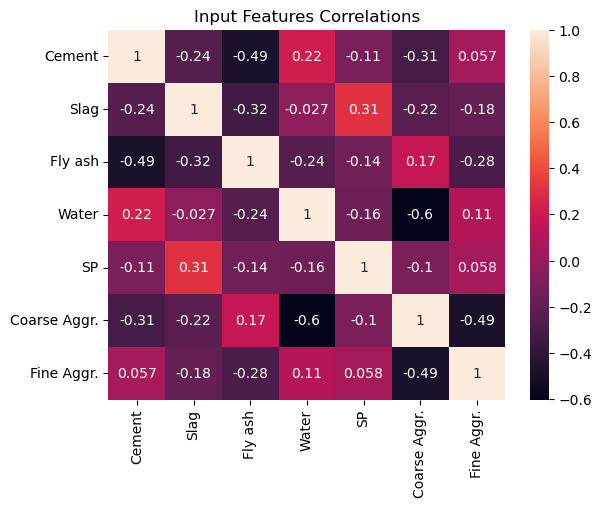

In [31]:
#Plot correlations between input features using pearsons coefficient
sns.heatmap(slump.iloc[:,1:8].corr(method='pearson'),annot = True)
plt.title("Input Features Correlations")

From the heatmap above, it is clear that there are no strong linear relationships (>0.9) between any of the input features. As such, all input features will be kept.

Mentioned in the source website, there are three output variables. For the this project, we are only interest in the variable "28-day Compressive Strength". As such, the other two output variables will be dropped. The variable 'No' will also be dropped as metioned, as this is not part of the input features listed on the source website. Below, we will separate the input and target variables into an X and y dataframe using indexes to identify variables of interest.

In [32]:
#Outputs required input features, and output feature into two dataframes based on user indexes specified
def data_prep(dataset,input_index,output_index):
    X = dataset.iloc[:,input_index]
    y = dataset.iloc[:,output_index]
    return (X,np.array(y.values.ravel()))

X,y = data_prep(slump,[1,2,3,4,5,6,7,8],[10])

# 3. Model Training

In this section, we will train two Voting regressor using 3 base estimators for regression, a support vector machine, a linear regression model, and a stochastic gradient descent regressor. The first Voting regressor will use default hyperparameters for the base estimators. For the second Voting regressor, we will investigate the performance if we fine tune the base estimator hyperparameters using grid search.

First we will split the dataset into training and test sets with a 80/20 split. We then standardise the the data post split to prevent data leakage. Data is standardised to allow for faster convergence, and prevent feature dominance/bias.

In [33]:
#Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123) 

#Scale data after splitting to prevent data leakage
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

## 3.1. Base Estimators

Here, we train our base estimators with default hyperparameter values on the concrete slump training sets and report their root mean squared errors on the scaled test set:

In [34]:
#Train a SVM regressor
SVM_reg = SVR()
SVM_reg.fit(X_train_scaled,y_train)

#Test model on testing set and get rmse
SVM_reg_pred = SVM_reg.predict(X_test_scaled)
print("SVM Root Mean Squared Error:")
print(str(mean_squared_error(squared=False,y_true=y_test,y_pred=SVM_reg_pred)) + " MPA")

SVM Root Mean Squared Error:
4.347914210445679 MPA


In [35]:
#Train a linear regression model
linear = LinearRegression()
linear.fit(X_train_scaled,y_train)

#Test model on testing set and get rmse
linear_pred = linear.predict(X_test_scaled)
print("Linear Regression Root Mean Squared Error:")
print(str(mean_squared_error(squared=False,y_true=y_test,y_pred=linear_pred)) + " MPA")

Linear Regression Root Mean Squared Error:
3.1035584419061744 MPA


In [36]:
#Train a stochastic gradeint descent regressor
SGD = SGDRegressor(random_state=123)
SGD.fit(X_train_scaled,y_train)

#Test model on testing set and get rmse
SGD_pred = SGD.predict(X_test_scaled)
print("SGD Root Mean Squared Error:")
print(str(mean_squared_error(squared=False,y_true=y_test,y_pred=SGD_pred)) + " MPA")

SGD Root Mean Squared Error:
2.985804283757301 MPA


The RMSE in this case, represents the average deviation of the predicted compressive strength (MPA) from the actual result compressive strength (MPA) of the concrete slump. From the results, the stochastic gradient descent model, having the smallest RMSE performs the best, having a RMSE of 2.98 MPA, followed by the linear regression model (3.1 MPA) and the SVM regressor model (4.34 MPA)

The SVM regressor is sensitive to hyperparameter changes. Since we using default values and not optimal hyperparamters, this is most likely the reason the SVM performs the worst. The linear model is relatively simple, and as such, may not be able to effiectively capture the relationship of the input and target variables if it is non-linear/complex. This could be a reason why the linear model performs worse compared to the SGD regressor.

## 3.2.  Voting Regressor

Using the base estimators (with default hyperparameters) trained in section 3.1, we will now train a Voting regressor. This regressor is an ensemble model which will average the individual base estimator predictions for its final prediction.

In [37]:
#Train a voting regressor using a SVM regressor, linear model and stochastic gradient descent regressor as base estimators
vote_regressor = VotingRegressor(estimators=[('SVM_reg', SVM_reg), ('linear', linear), ('SDG', SGD)])
vote_regressor.fit(X_train_scaled,y_train)

#Test model on testing set and get rmse
vote_regressor_pred = vote_regressor.predict(X_test_scaled)
print("Voting Regressor Root Mean Squared Error:")
print(str(mean_squared_error(squared=False,y_true=y_test,y_pred=vote_regressor_pred)) + " MPA")

Voting Regressor Root Mean Squared Error:
2.447507121245018 MPA


As we can see above, the voting regressor yielded a RMSE of 2.45 MPA, smaller than the RMSE of the base estimators. By using an ensemble and averaging approach, the voting regressor is able to combine the strengths of its base estimators as well as prevent overfitting. Consequently, this results in the voting regressor performing better than it's individual base estimators.

To have a look at the performance of the base estimators and the voting regressor visually, we can plot each model's predicted values against the true value. The line y=x has also been plotted. This line represents where the predicted value is equal to the true value.

Text(0.5, 1.0, 'Predicted Values vs True Values')

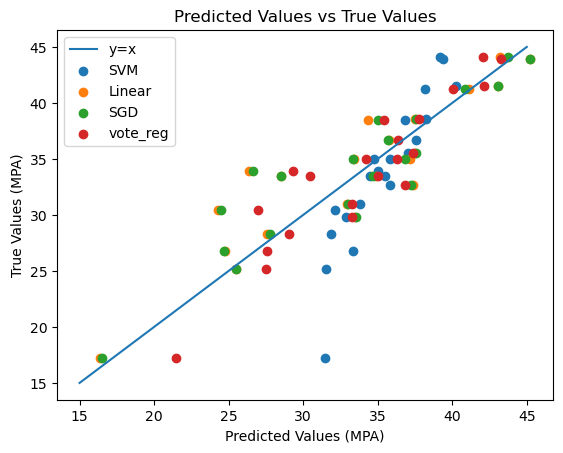

In [38]:
#Plot predicted values of models versus ground truth values
plt.figure()
plt.scatter(SVM_reg_pred,y_test,label="SVM")
plt.scatter(linear_pred,y_test,label="Linear")
plt.scatter(SGD_pred,y_test,label="SGD")
plt.scatter(vote_regressor_pred,y_test,label="vote_reg")

#plotting the line y = x
plt.plot([i for i in range(15,46)],[i for i in range(15,46)],label="y=x")
plt.legend()
plt.xlabel("Predicted Values (MPA)")
plt.ylabel("True Values (MPA)")
plt.title("Predicted Values vs True Values")

The performance of the models is further reflected by the graph of the predicted values vs the ground truth values. Model's which have instances closer to the line y = x perform better (since this means predicted compressive strength = true compressive strength). For our results, the SVM regressor predictions stray the furtherest from the line y=x and performs the worst (this is reflected by its worst RMSE too). The linear, SGD and vote regressor model predictions however are much more closer to y=x, with the SGD and vote_regressor predictions more so, therefore indicating better performance. 

## 3.3. Voting Regressor with grid search

We will now investigate the performance of the voting regressor if we fine tune the base estimator hyperparameters using grid search.

<br>

For the SVM regressor, we will perform a grid search for the hyperparameters 'gamma' and 'C'. 3-fold cross-validation will be used to effectively measure the models performance on unseen data(validation sets):

<b>gamma:</b> Controls the influence of instances on the decision boundary. Higher values of gamma will result in a more complex boundary while smaller values in gamma will result in a less complex decision boundary. 

<b>C:</b> Determines the trade-off between margin size, and margin violations. For regression, a smaller value of C will result in a larger margin and less margin violations(but possibly overfitting), while smaller values of C will result in a much more smaller margin, however with the chance of more margin violations (and possibly underfitting). 

Consequently, 'gamma' and 'C' have a strong impact on the performance of the SVM, and therefore it is important to fine tune these values.

In [39]:
#Determining best hyperparameters for SVM base estimator
SVM_grid = SVR()
SVM_parameters = {'gamma':[0.001,0.01,0.1,1,10,100], 'C':[0.1,1, 10,100,1000]}

#Perform grid search on knn model with 3-fold cross validation on training set
grid_search = GridSearchCV(SVM_grid, SVM_parameters,cv=3,scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)


print("-------------------------------- SVM grid search results: ---------------------------------")
pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),
           pd.DataFrame(np.sqrt(-grid_search.cv_results_["mean_test_score"]), 
                        columns=["Root Mean Squared Error"])],axis=1).sort_values(by="Root Mean Squared Error")

-------------------------------- SVM grid search results: ---------------------------------


,C,gamma,Root Mean Squared Error
25,1000.0,0.010,1.186258
19,100.0,0.010,2.136794
26,1000.0,0.100,2.411255
20,100.0,0.100,2.411255
24,1000.0,0.001,2.729626
14,10.0,0.100,3.269779
18,100.0,0.001,4.705896
13,10.0,0.010,5.061352
21,100.0,1.000,6.836302
27,1000.0,1.000,6.836302


A grid search with 3-fold cross validation was performed  over the values [0.001,0.01,0.1,1,10,100] and [0.1,1, 10,100,1000] for the hyperparameters gamma and C respectively. From the results above, a value of 1000 for C and 0.010 for gamma achieved the lowest root mean squared error of 1.18 MPA for the SVM regressor.

For the Linear regressor, we will perform a grid search for the hyperparameters 'positive'. 3-fold cross-validation will be used to effectively measure the models performance on unseen data(validation sets). The hyperparameter 'positive' controls whether the linear regressor will force coefficients to be positive or not. When False, coefficients can take the value of a negative or positive number. When True, coefficients are forced to be positive.

In [40]:
#Determining best hyperparameters for linear regression base estimator
linear_grid = LinearRegression()
linear_parameters = {'positive':[False,True]}

#Perform grid search on knn model with 3-fold cross validation on training set
grid_search = GridSearchCV(linear_grid, linear_parameters,cv=3,scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)


print("--------------------------------Linear Regressor grid search results:---------------------------------")
pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),
           pd.DataFrame(np.sqrt(-grid_search.cv_results_["mean_test_score"]), 
                        columns=["Root Mean Squared Error"])],axis=1).sort_values(by="Root Mean Squared Error")

--------------------------------Linear Regressor grid search results:---------------------------------


,positive,Root Mean Squared Error
0,False,2.804761
1,True,2.893632


A grid search with 3-fold cross validation was performed over the values [False,True] for the hyperparameter "positive". From the results above, the value False produced the lowest root mean squared error of 2.8 MPA versus the RMSE of 2.89 MPA for positive = True. Therefore a value of False will be optimal for the hyperparameter "positive".

For the stochastic gradient descent regressor, we will perform a grid search with for the hyperparamters 'penalty', 'alpha' and 'max_iter'. 3-fold cross-validation will be used to effectively measure the models performance on unseen data(validation sets):

<b>penalty:</b> Defines the type of regularisation that will be used in the model. Regularisation applies a penalty term for larger coefficients and is used to prevent overfitting. As each regularisation type (or using no regularisation at all) has different effects on how they penalise the model coefficients, we should perform a grid search to see which technique is optimal for our regression task.

<b>alpha</b>: Determines the strength of the regularisation penalty term. A value of alpha too high would result in smaller coefficeints and possible underfitting. A value too small however could allow the model to fit more closely to the data and lead to higher coefficients and possible overfitting. As such it is important to determine the best value of alpha.

<b>max_iter:</b>: Determines the max number of iterations the SGD regressor makes during gradient descent before stopping at a value. A low value of max_iter may reduce computation time and overfitting, however could result in the model not having enough interations to converge to the optimal result (and therefore underfitting). A higher value of max_iter could help the model have enough iterations to converge to an optimal value, however increases computation time and risks overfitting. As such, fine tuning the max_iter hyperparameter is also important

In [41]:
#Determining best hyperparameters for SGD base estimators
SGD_grid = SGDRegressor(random_state=123)
SGD_parameters = {'penalty':['l2', 'l1', 'elasticnet',None], 'alpha':[0.0001,0.01, 0.1,1,10],
                  'max_iter':[500,600,700,800,900,1000]}

#Perform grid search on knn model with 3-fold cross validation on training set
grid_search = GridSearchCV(SGD_grid, SGD_parameters,cv=3,scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)


print("--------------------------------SGD Regressor grid search results:---------------------------------")
pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),
           pd.DataFrame(np.sqrt(-grid_search.cv_results_["mean_test_score"]), 
                        columns=["Root Mean Squared Error"])],axis=1).sort_values(by="Root Mean Squared Error")

--------------------------------SGD Regressor grid search results:---------------------------------


,alpha,max_iter,penalty,Root Mean Squared Error
29,0.01,600,l1,2.800162
25,0.01,500,l1,2.800162
33,0.01,700,l1,2.800162
37,0.01,800,l1,2.800162
41,0.01,900,l1,2.800162
...,...,...,...,...
97,10.00,500,l1,8.477584
109,10.00,800,l1,8.477584
101,10.00,600,l1,8.477584
113,10.00,900,l1,8.477584


A grid search with 3-fold cross validation was performed over the values ['l2', 'l1', 'elasticnet'], [0.0001,0.01, 0.1,1,10] and  [500,600,700,800,900,1000] for the hyperparameters penalty, alpha and max_iter respectively. From the results above, a value of 0.01 for alpha, 600 for max_iter, and l1 for penalty achieved the lowest root mean squared error of 2.8 MPA for the SGD regressor.

Now using the optimal hyperparameter values found from the grid searches above, we will retrain our base estimators using the optimal hyperparameters and report their RMSE for the compressive stregnth prediction.

In [42]:
#Base estimator with optimal hyper parameters RMSE

#Train a SVM regressor
SVM_reg_grid = SVR(C=1000,gamma=0.01)
SVM_reg_grid.fit(X_train_scaled,y_train)

#Train a Linear regressor
linear_reg_grid = LinearRegression(n_jobs=1)
linear_reg_grid.fit(X_train_scaled,y_train)

#Train a SGD regressor
SGD_grid = SGDRegressor(penalty="l1",max_iter=600,alpha=0.01,random_state=123)
SGD_grid.fit(X_train_scaled,y_train)


#Test model on testing set and get rmse
SVM_reg_grid_pred = SVM_reg_grid.predict(X_test_scaled)
linear_reg_grid_pred = linear_reg_grid.predict(X_test_scaled)
SGD_grid_pred = SGD_grid.predict(X_test_scaled)
print("SVM Root Mean Squared Error:")
print(str(mean_squared_error(squared=False,y_true=y_test,y_pred=SVM_reg_grid_pred)) + " MPA")

print("\nLinear Regression Root Mean Squared Error:")
print(str(mean_squared_error(squared=False,y_true=y_test,y_pred=linear_reg_grid_pred)) + " MPA")

print("\nSGD Root Mean Squared Error:")
print(str(mean_squared_error(squared=False,y_true=y_test,y_pred=SGD_grid_pred)) + " MPA")

SVM Root Mean Squared Error:
0.7110877309615593 MPA

Linear Regression Root Mean Squared Error:
3.1035584419061744 MPA

SGD Root Mean Squared Error:
2.9799506674563467 MPA


As mentioned in section 3.1, the SVM regressor is extremely sensitive to hyperparameter changes. When we use the optimal hyperparameters found from grid search, the SVM regressor's performance improves dramatically, achieving a lower RMSE of 0.71 MPA compared to 4.34 MPA when using default hyperparamters. It is now also the best performing out of the base estimators.
The SGD regressor also saw increases in performance, achieving a lower RMSE of 2.979 MPA compared to their original RMSEs of 2.985. The linear regressor however saw no change in performance. This is expected though as the optimal value found for the hyperparameter "positive" (False) is the same as it's default value.

In [43]:
#Training a voting regressor using the optimal parameters found above
#Train a voting regressor using a SVM regressor, linear model and stochastic gradient descent regressor as base estimators
vote_regressor_optimal = VotingRegressor(estimators=[('SVM_reg', SVR(C=1000,gamma=0.01)), 
                                             ('linear', LinearRegression(n_jobs=1)), 
                                             ('SDG', SGDRegressor(penalty="l1",max_iter=600,alpha=0.01,random_state=123))])
vote_regressor_optimal.fit(X_train_scaled,y_train)

#Test model on testing set and get rmse
vote_regressor_optimal_pred = vote_regressor_optimal.predict(X_test_scaled)
print("Voting Regressor Root Mean Squared Error:")
print(mean_squared_error(squared=False,y_true=y_test,y_pred=vote_regressor_optimal_pred))

Voting Regressor Root Mean Squared Error:
2.1929941048893586


As we can see above, the voting regressor, when using optimal hyperparamters for its base estimators, showed improveiment in performance, yielding a RMSE of 2.19 MPA compared to 2.44 MPA previously. This is as expected as the base estimators saw improved performances using optimal hyperparameters, therefore resulting in improved performance for the voting regressor.

Similar to before, the voting regressor achieved a smaller than the RMSE of the linear and SGD regressor estimators. It however, achieves a higher RMSE compared to the SVM estimator (2.19 MPA vs 0.71 MPA). This however is not a problem because using an ensemble and averaging approach, the voting regressor is able to combine the strengths of its base estimators as well as prevent overfitting.


To have a look at the performance of the base estimators with optimal hyperparameters and the resulting voting regressor visually, we can plot each model's predicted values against the true value. The line y=x has also been plotted. This line represents where the predicted value is equal to the true value.

Text(0.5, 1.0, 'Predicted vs True Values')

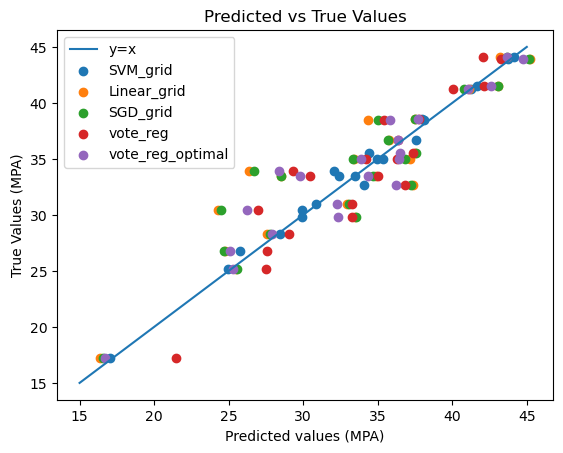

In [44]:
#Plot predicted values of models versus ground truth values
plt.scatter(SVM_reg_grid_pred,y_test,label="SVM_grid")
plt.scatter(linear_reg_grid_pred,y_test,label="Linear_grid")
plt.scatter(SGD_grid_pred,y_test,label="SGD_grid")
plt.scatter(vote_regressor_pred,y_test,label="vote_reg")
plt.scatter(vote_regressor_optimal_pred,y_test,label="vote_reg_optimal")

#Plot y=x (where predicted value = true value)
plt.plot([i for i in range(15,46)],[i for i in range(15,46)],label="y=x")
plt.legend()
plt.xlabel("Predicted values (MPA)")
plt.ylabel("True Values (MPA)")
plt.title("Predicted vs True Values")

The performance of the models is further reflected by the graph of the predicted values vs the ground truth values. Model's which have instances closer to the line y = x perform better (since this means predicted compressive strength = true compressive strength). From the graph above, we can see that the new voting regressor model's predictions are also more closer to y=x (ie. where prediction = true value) when compared to the linear and SGD base estimators using grid_search. When compared to the voting regressor with default parameters, although very close, there seems to be a bigger proportion of predictions that are closer to the true value (y=x). For SVM regressor however, there is a much larger proportion of points which lie on, or are near y=x, indicating better performance. This is reflected by its low RMSE value of 0.7 compared to other models.

# PART 3. Abalone Dataset

# 1. Import and inspect dataset
This section of the project will work with the Abalone dataset obtained from https://archive.ics.uci.edu/ml/datasets/Abalone. 
From the data dictionary described on the source website, the dataset should contain 4177 instances with 8 attributes and a target column called rings representing an Abalone's age. Our task is to use the 8 input attributes to predict an Abalone's age in terms of ring value.

We will first read in the Abalone dataset and inspect it to confirm that the features are the same as those listed in the source website, and whether any preprocessing of data will be required (missing values e.t.c).

In [45]:
#Column names as defined on source website
col_names = ["sex","length","diameter","height","whole_weight",
             "shucked_weight","viscera_weight","shell_weight","rings"]

#Read in dataset
abalone = pd.read_csv("abalone.data",names=col_names)

First we will look at the first 5 rows of the dataset to have a rough understanding of the dataset and it's structure:

In [46]:
abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


From the head of the dataset, we confirm that all required feature and target variables are present. Datatypes are also as expected from the source website, with sex being nominal, rings being an integer, and the remaining features being continuous. One thing to also note is that it the input features do not seem to be in the same scale, and therefore standardising/normalising will need to be performed.

For more detailed properties of the features, we now use the .info() method:

In [47]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


From the info above we can see that:
- There is mo missing data
- There is one object feature (sex) which will need to be converted to numeric using one hot encoding
- 4177 instances as expected
- Features are of the expected data types

We will now have a deeper look into the dataset and produce visualisations to understand the relationship and propoerties of the features in the dataset.

One thing we can look at is the proportion of the classes for the 'sex' feature. If it is imbalanced, we may want to consider splitting the datasets in a way that the training and test sets have the same proportion of "sex".

<AxesSubplot:xlabel='sex', ylabel='count'>

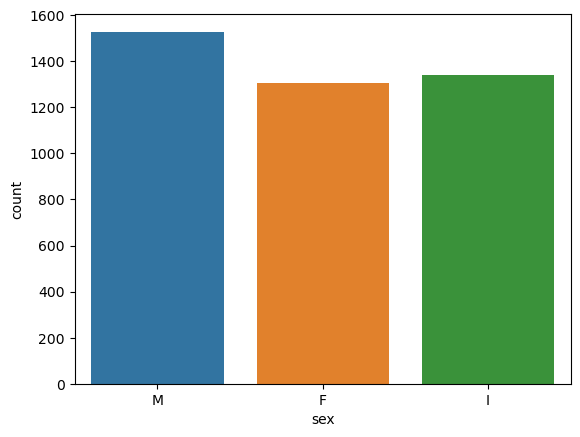

In [48]:
#Plot a count plot of the categorical feature 'sex'
sns.countplot(x =abalone['sex'])

The countplot above shows that majority sex is M, followed by I, and finally F. The distribution of sex however is relatively the same, and as such stratified splitting for 'sex' won't necessarily be needed.

To see if any variables can be dropped, we can look at the linear correlation between variables. Reducing the number of variables may help the model be less complex and reduce the computation time. As linearly correlated features have nearly the same capacity in predicting the target variable, we can therefore keep one only of the correlated variables with minimal decrease in model peformance.

First lets look at the pairwise plots between input variables to see if there are any strong linear relationships:

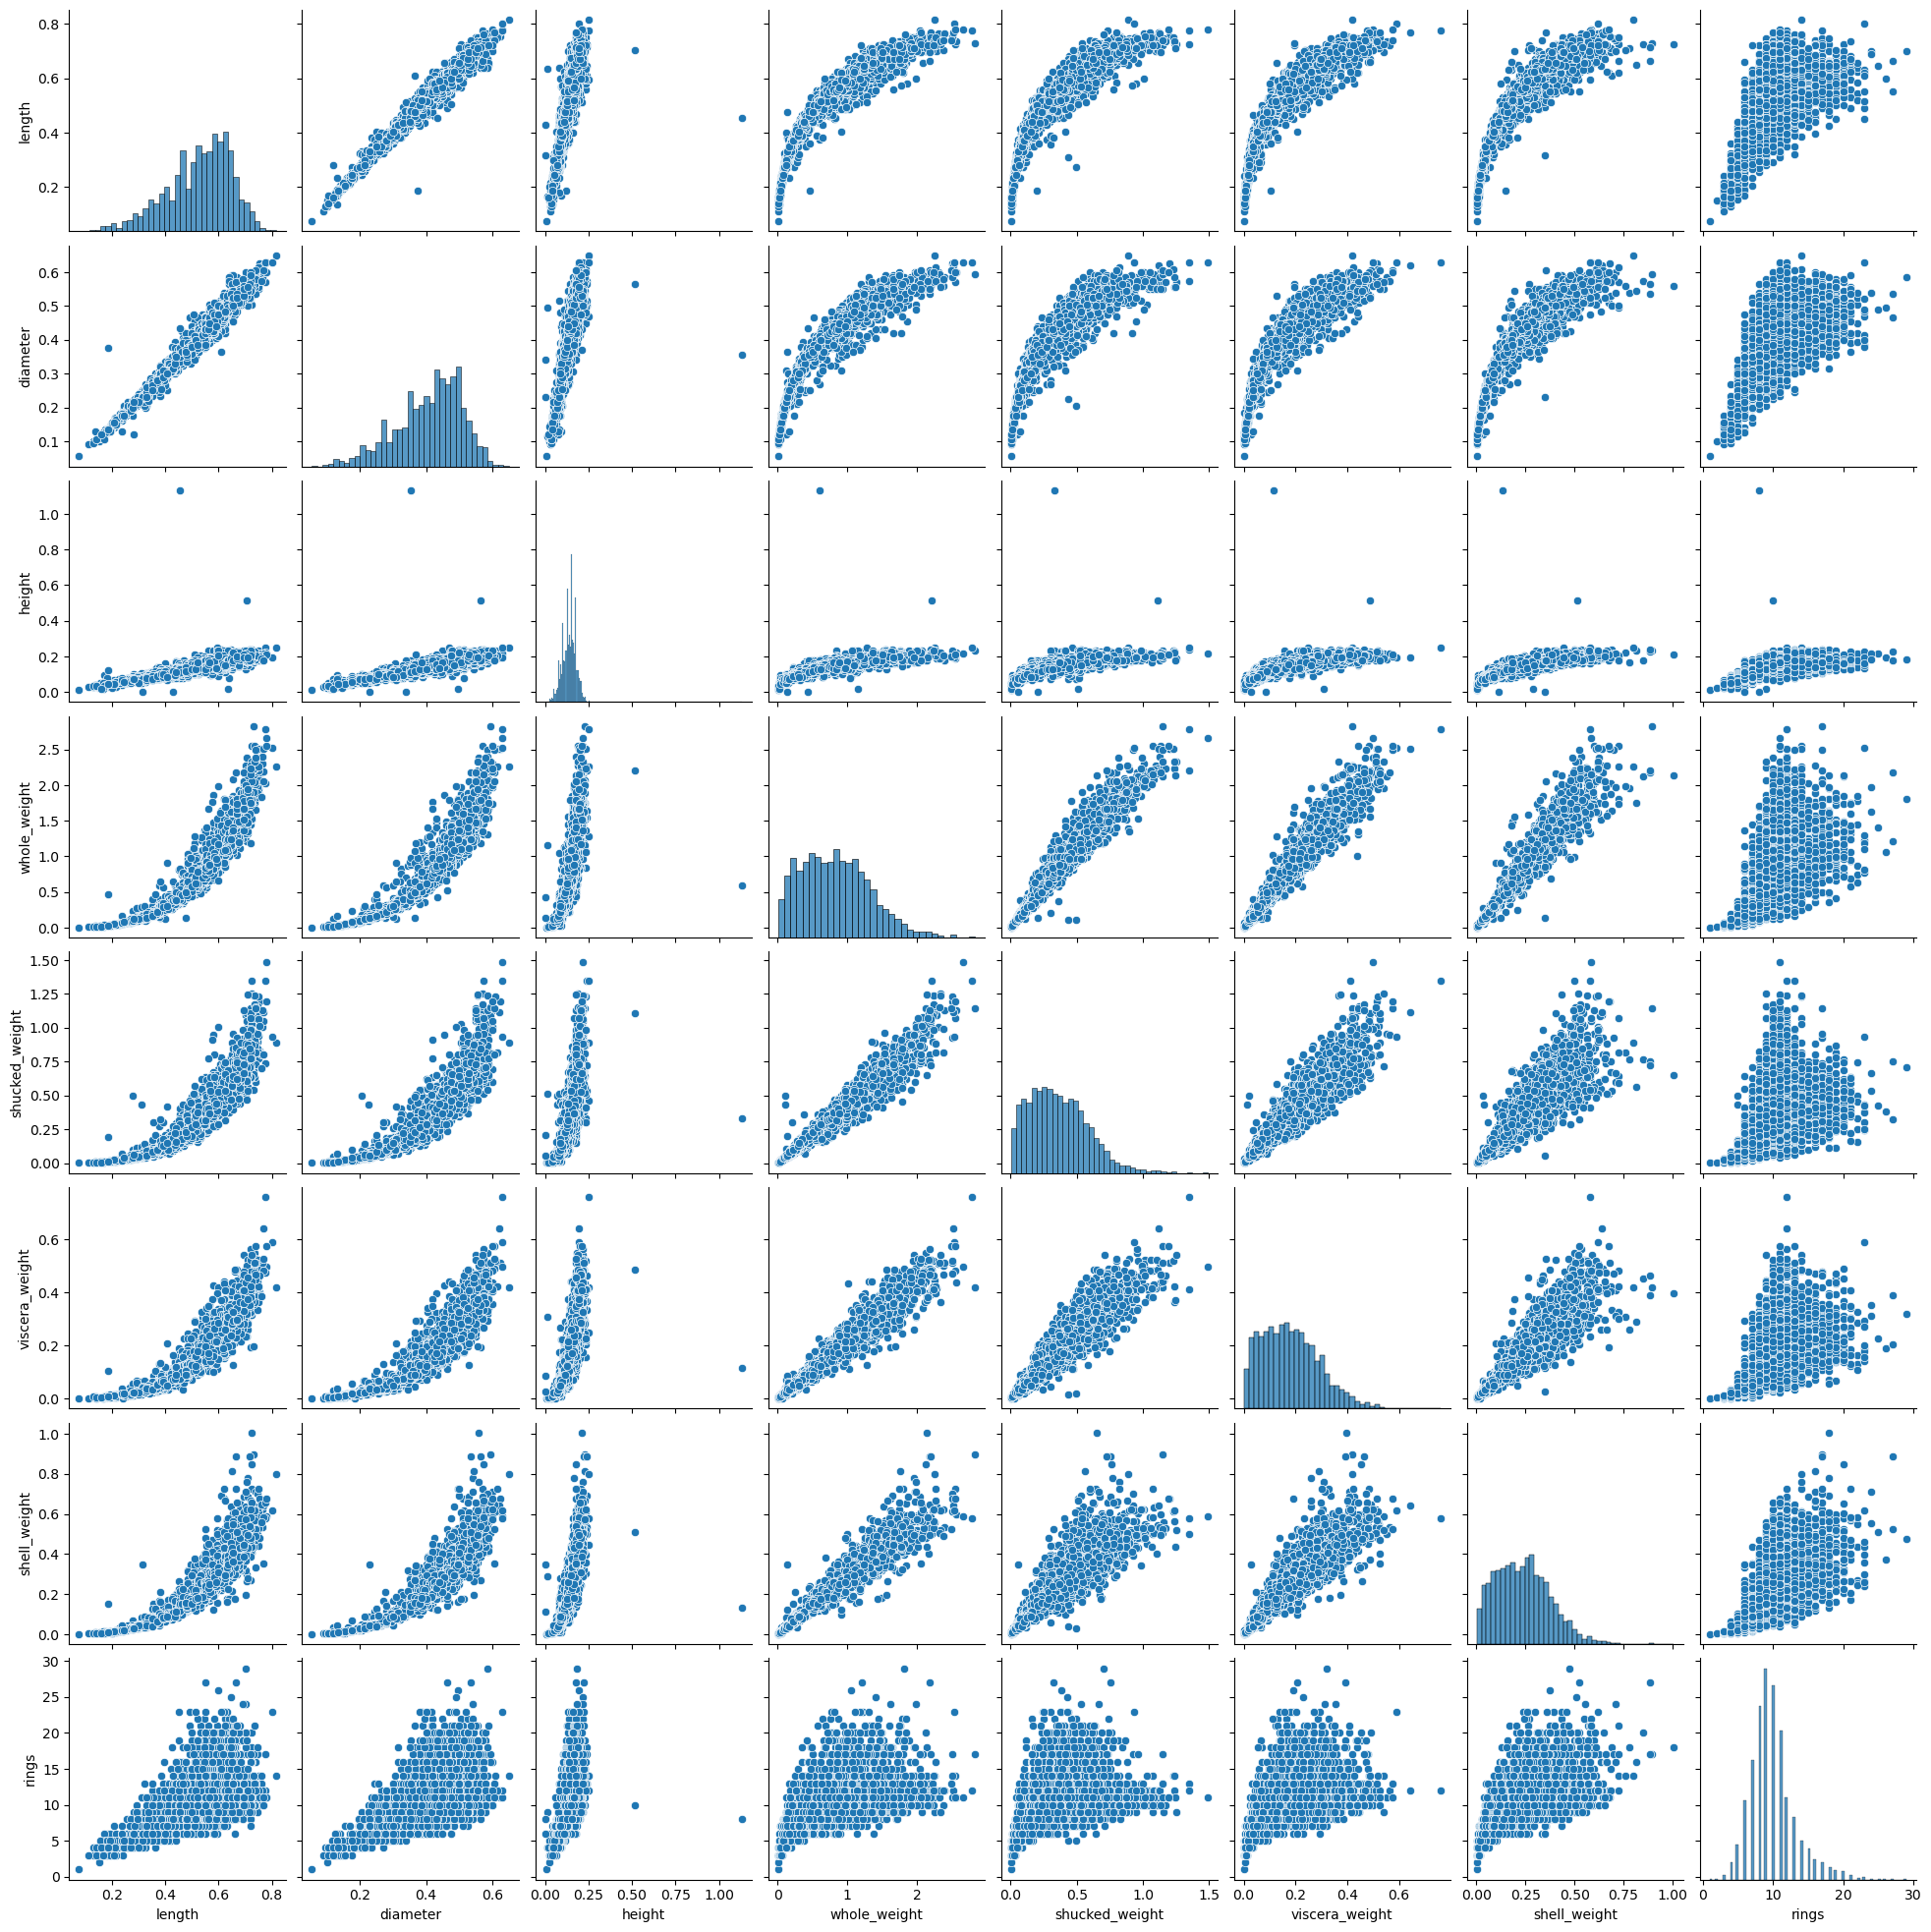

In [49]:
sns.pairplot(abalone)

From the pairplot above, we can see that multiple features show a strong linear relationship with each other. In particular, legnth and diameter, and whole_weight, shucked_weight, viscera_weight and shell_weight all show positive linear relationships.

We can confirm this by plotting a heatmap of the correlations between input features using Pearson's coefficient

Text(0.5, 1.0, 'Input feature pearson correlations')

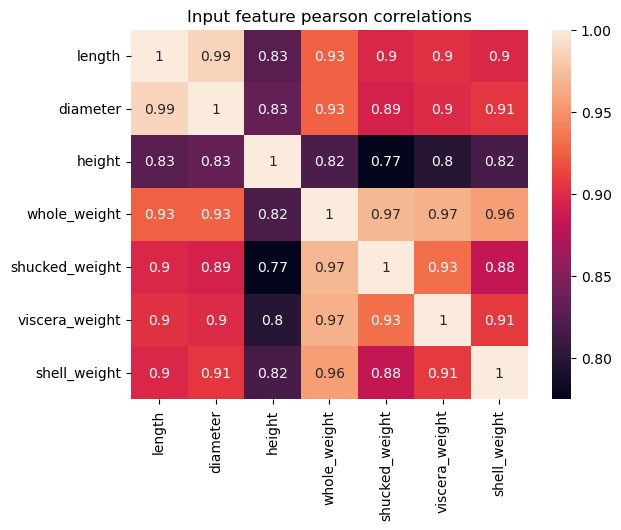

In [50]:
sns.heatmap(abalone.iloc[:,0:8].corr(method='pearson'),annot = True)
plt.title("Input feature pearson correlations")

From the pairplot above, we can see that length is highly correlated with diameter, having a correlation of 0.99
Furthermore, whole_weight, shucked_weight, viscera_weight and shell_weight are all highly correlated. Whole_weight in particular has the strongest correlation between the other three weight variables, having correlations of 0.97, 0.97 and 0.96 with shucked_weight, viscera_weight and shell_weight.




Based on the visualisations and inspections above:

- Diameter will be dropped and length will be kept due to their high correlations
- Based on the data dictionary from https://archive.ics.uci.edu/ml/datasets/Abalone, the whole weight of the abalone (whole_weight) can be considered the sum of the meat(shucked weight), guts(viscera_weight) and shell(shell_weight). This is reflected by the high correlation coefficients of > 0.95 seen above. Therefore weight will be dropped, while the other three weight variables will be kept.
- One hot encoding will need to be applied for 'sex'

# 2. Data Preprocessing

We will now divide the datasets into their input and target features. As mentioned in Section 1, we will be dropping the variables diameter and whole_weight. As ML models cannot work with string data, the catagorical variable 'sex' will need to be converted to numeric. One hot encoding using the pd.get_dummies method is used to achieve this.

In [51]:
#Split dataset into X and y, keeping only required features
X = abalone[["sex","length","height","shucked_weight","viscera_weight","shell_weight"]]
y = abalone["rings"]

#Apply one hot encoding for categorical variable sex
dummy = pd.get_dummies(X['sex'], drop_first=True)
X_one_hot = pd.concat([X.drop("sex",axis = 1), dummy], axis = 1)

We then split the datasets into training and test sets with a 85/15 split. Data is scaled using standard scaling post split to prevent data leakage. Data is standardised to allow for faster convergence, and prevent feature dominance/bias. As we only want to apply standardisation to numerical variables, we will temporarily drop the one hot encoded variables and add them back after scaling.

In [52]:
#Split test and training
X_train, X_test, y_train, y_test = train_test_split(X_one_hot,y,test_size = 0.15, random_state=123)

#Separate numerical and categorical variables. In this case cat variables are the last two columns
X_train_num = X_train.iloc[:,0:-2]
X_test_num = X_test.iloc[:,0:-2]
X_train_cat = X_train.iloc[:,[-1,-2]].reset_index(drop=True)
X_test_cat =  X_test.iloc[:,[-1,-2]].reset_index(drop=True)

#Standardise data
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num) 
X_test_num_scaled = scaler.transform(X_test_num)

#Convert scaled numeric data back into dataframe and combine categorical variables
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)
X_train_scaled = pd.concat([X_train_num_scaled_df, X_train_cat], axis=1)

X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)
X_test_scaled = pd.concat([X_test_num_scaled_df, X_test_cat], axis=1)

# 3. Model Training

## 3.1 Decision Tree: Experimenting max_depth values

We will now train a decision Tree using the abalone training set, and experiment the effect of max_depth on the model's performance on predicting the ring number of abalones. For each max_depth value of 1 to 20, we will measure the RMSE in ring number prediction on the training set and test set, and the cross validation RMSE in ring number prediction on the training set to evaluate performance.

The hyperparameter max_depth will prevent the tree from expanding any nodes past the depth defined, and therefore prevent any overfitting. Low values may result in too much constraints and underfitting of the model, while high values may result in a tree of large depth which overfits the data.

In [53]:
#Train a decision tree at multiple max_depth values

#Lists storing errors at each depth
training_errors_depth = []
test_errors_depth = []
cross_val_errors_depth = []

#Testing depth 1 to 20
for i in range(1,21):
    #Create model with max_depth = i
    tree_depth = DecisionTreeRegressor(max_depth = i)
    tree_depth.fit(X_train_scaled,y_train)

    #Determine Training RMSE
    train_rmse_depth = mean_squared_error(squared = False, y_true = y_train,
                                    y_pred = tree_depth.predict(X_train_scaled))
    
    #Determine Test RMSE
    test_rmse_depth = mean_squared_error(squared = False, y_true = y_test,
                                    y_pred = tree_depth.predict(X_test_scaled))
    
    #Determine Cross val RMSE
    cross_val_rmse_depth = np.mean(np.sqrt(-cross_val_score(tree_depth, X_train_scaled, y_train, 
                                                            cv=3,scoring='neg_mean_squared_error')))
    
    #Append errors
    training_errors_depth.append(train_rmse_depth)
    test_errors_depth.append(test_rmse_depth)
    cross_val_errors_depth.append(cross_val_rmse_depth)

The plot below displays the training, test and cross-validation RMSE of the decision tree's ring age prediction at varying max_depth values:

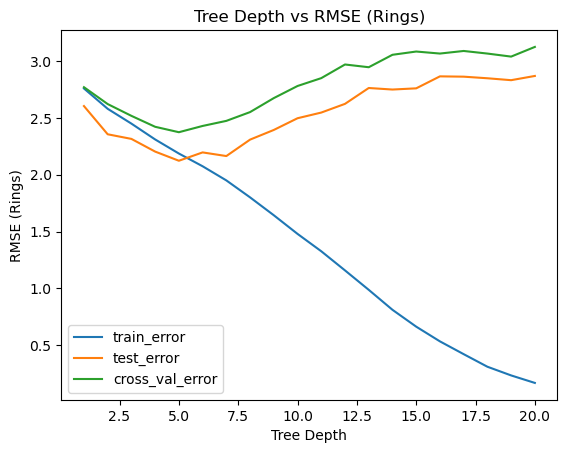

In [54]:
#Plot training, test, and cross_val RMSE vs max_depth
plt.plot([i for i in range(1,21)],training_errors_depth,label="train_error")
plt.plot([i for i in range(1,21)],test_errors_depth,label="test_error")
plt.plot([i for i in range(1,21)],cross_val_errors_depth,label="cross_val_error")
plt.xlabel("Tree Depth")
plt.ylabel("RMSE (Rings)")
plt.title("Tree Depth vs RMSE (Rings)")
plt.legend()

From the plot above, we can see that as we increase the tree depth(max_depth), the root mean squared error in the ring number model prediction decreases dramatically. Both the test and training RMSE for ring number prediction also decrease, however up to a local minima. After this point, any increase in tree depth results in a increase in train and test error (indicating overfitting to training set). This local minima appears to be around max_depth 5 for the test and cross_validation error. 

Based on this graph we should pick a max_depth which produces the minimum RMSE in ring age prediction for the cross_validation error, which in this case is 5. While this number happens to also produce the minimum test error, it is the cross_validation error we want to decide our max depth value on as the testing set should only be used for testing our final model on how it will perform on unseen data. Furthermore, using cross validation, the cross_val RMSE is more representative to how the model will generalise to new and unseen data compared to the training error. As such, a max_depth of 5 will be optimal

## 3.2 Decision Tree: Experimenting min_samples_leaf values

We will now train a decision Tree using the abalone training set, and experiment the effect of min_samples_leaf on the model's performance on predicting the ring number of abalones. For each min_samples_leaf value in [10,20,30,...,490,500], we will measure the RMSE in ring number prediction on the training set and test set, and the cross validation RMSE in ring number prediction on the training set to evaluate performance.

Setting the min_samples_leaf will prevent the tree from expanding any nodes if it results in a leaf node with samples less than the value specified. As such, this will prevent the tree from splitting at certain nodes and therefore reduce overfitting.

In [55]:
#Train a decision tree at multiple min_samples_leaf values

#Lists storing errors at each min_samples_leaf
training_errors_leaf = []
test_errors_leaf = []
cross_val_errors_leaf = []

#Testing min_samples_leaf 10,20,30,40,.....,490,500
for i in range(10,500,10):
    tree_leaf = DecisionTreeRegressor(max_depth = 5,min_samples_leaf = i)
    tree_leaf.fit(X_train_scaled,y_train)

    #Determine train RMSE
    train_rmse_leaf = mean_squared_error(squared = False, y_true = y_train,
                                    y_pred = tree_leaf.predict(X_train_scaled))
    
    #Determine test RMSE
    test_rmse_leaf = mean_squared_error(squared = False, y_true = y_test,
                                    y_pred = tree_leaf.predict(X_test_scaled))
    #Determine cross validation RMSE
    cross_val_rmse_leaf = np.mean(np.sqrt(-cross_val_score(tree_leaf, X_train_scaled, y_train, 
                                                           cv=3,scoring='neg_mean_squared_error')))
    #Store errors found
    training_errors_leaf.append(train_rmse_leaf)
    test_errors_leaf.append(test_rmse_leaf)
    cross_val_errors_leaf.append(cross_val_rmse_leaf)

The plot below displays the training, test and cross-validation RMSE in the decision tree's ring number prediction at varying min_samples_leaf values:

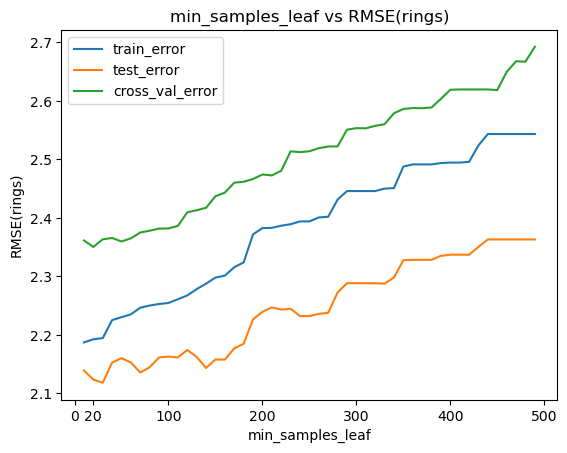

In [56]:
#Plot train, test and cross validation RMSE vs min_samples_leaf
plt.plot([i for i in range(10,500,10)],training_errors_leaf,label="train_error")
plt.plot([i for i in range(10,500,10)],test_errors_leaf,label="test_error")
plt.plot([i for i in range(10,500,10)],cross_val_errors_leaf,label="cross_val_error")

#Graph titles and labels
plt.xticks([0,20,100,200,300,400,500], ["0","20","100","200","300","400","500"])
plt.xlabel("min_samples_leaf")
plt.ylabel("RMSE(rings)")
plt.title("min_samples_leaf vs RMSE(rings)")
plt.legend()

From the plot above, we can see that as we decrease the min_samples_leaf, the training error, test_error and cross_validation RMSE in ring number prediction decreases. As mentioned, we want to minimise the cross_validation error. Based on the cross_validation error, the local minima is around min_samples_leaf = 20. Therefore a value of 20 for min_samples_leaf is optimal.

## 3.3 Random Forest

Using the optimal parameters found in section 3.1 and 3.2, we will now train a random forest using 500 decision tree estimators. The Random Forest model also has additional hyperparameters of its own, and consequently, we will manually tune experiment optimal values for these parameters.
### 3.3.1 Hyperparameter Tuning
<b>Max Features</b>

The first parameter we will look at is max_features. A random forest consists of an ensemble of dececision tree with each tree trained on a random subset of the input features. The hyperparamter max_features determines the max number of features that can considered when looking for the best split. A low value of max_features will reduce the complexity of the model however risk underfitting. Conversely, a high value of max_features will result in a model which can fit more closely to the data at the risk of overfitting. 

In the code below, we evaluate the performance of the random forest on the training set at varying max_features values from 1 to 7 and report the RMSE in ring number prediction.

In [57]:
#Experimenting best values for max_features
error = []
for i in [1,2,3,4,5,6,7]:
    random_forest = RandomForestRegressor(n_estimators = 500, max_depth = 5, min_samples_leaf=20,max_features=i,
                                          random_state=123)
    random_forest.fit(X_train_scaled,y_train)
    random_forest_pred = np.round(random_forest.predict(X_train_scaled))
    error.append(mean_squared_error(squared = False, y_true = y_train, y_pred = random_forest_pred))
for i in range(1,8):
    print("Max_features = "+str(i) + " rmse: " + str(error[i-1]) + " rings")

Max_features = 1 rmse: 2.396770127119729 rings
Max_features = 2 rmse: 2.294267197130924 rings
Max_features = 3 rmse: 2.2330425148750384 rings
Max_features = 4 rmse: 2.1938454244724883 rings
Max_features = 5 rmse: 2.172685752768147 rings
Max_features = 6 rmse: 2.161311547564072 rings
Max_features = 7 rmse: 2.1483698372827895 rings


From the results above, we can see that considering all features (max_features = 7) during node split decision achieves the best performance and lowest RMSE. The RMSE in this context is the average error in the ring number prediction. However as mentioned above, a high value of max_features may result in overfitting, and as such, we will use the value of max_features = 4 as it is in the middle, lowering chances of underfitting and overfitting.

<br><br> <b>bootstrap</b>

The next hyperparamter we will look at is bootstrap. Bootstrap can take two values, False and True. When bootstrap = False, each deicison tree in the random forest is trained using the entire dataset. This however, could result in trees having high correlations with each other and consequently resulting in model overfitting. When bootstrap = True, bootstrap sampling is used whereeach decision tree is trained using different subsets of the training data with replacement, therefore preventing the correlation problem metioned and reducing overfitting.  

In the code below, we evaluate the performance of the random forest on the training set with bootstrap = True and False and report the RMSE in ring number prediction. The random forest uses the same optimal hyperparameters for the decision trees found in section 3.2.

In [58]:
#Experimenting best value for bootstrap
error = []
for i in [False,True]:
    random_forest = RandomForestRegressor(n_estimators = 500, max_depth = 5, min_samples_leaf=20,max_features=4,bootstrap=i,
                                          random_state=123)
    random_forest.fit(X_train_scaled,y_train)
    random_forest_pred = np.round(random_forest.predict(X_train_scaled))
    error.append(mean_squared_error(squared = False, y_true = y_train, y_pred = random_forest_pred))
for i in [False,True]:
    print("bootstrap = "+str(i) + " rmse: " + str(error[i]) + " rings")

bootstrap = False rmse: 2.182129725943229 rings
bootstrap = True rmse: 2.1938454244724883 rings


Based on the results, setting bootstrap = False performs slightly better on the training set, achieving a RMSE of 2.18 in ring prediction versus 2.19 when bootstrap = True. As the performance increase is minimal, and the fact that bootstrapping may prevent overfitting, we decide to use bootstrap = True

<br> <br><b>max_samples</b>

The next hyperparamter we will look at is max_samples. Max samples determines the number of samples in a subset of the dataset which the decision trees in the random forest will be trained on. Lower values of max samples may reduce model variance, complexity and therefore prevent overfitting (however at the risk of underfitting). Conversely, higher values of max_samples may result in a model with less bias and therefore prevent underfitting (at the risk of overfitting).

In the code below, we evaluate the performance of the random forest on the training set at varying values of max_samples in [10,100,500,1000,2000,3000] and report the RMSE in ring number prediction. The random forest uses the same optimal hyperparameters for the decision trees found in section 3.2.

In [59]:
#Experimenting best value for max_samples
error = []
for i in [10,100,500,1000,2000,3000]:
    random_forest = RandomForestRegressor(n_estimators = 500, max_depth = 5, min_samples_leaf=20,max_features=4,bootstrap=True,
                                         max_samples=i,random_state=123)
    random_forest.fit(X_train_scaled,y_train)
    random_forest_pred = np.round(random_forest.predict(X_train_scaled))
    error.append(mean_squared_error(squared = False, y_true = y_train, y_pred = random_forest_pred))
for i in range(0,6):
    print("Max samples = "+str([10,100,500,1000,2000,3000][i]) + " rmse: " + str(error[i]) + " rings")

Max samples = 10 rmse: 3.2571481520660126 rings
Max samples = 100 rmse: 2.577694132796504 rings
Max samples = 500 rmse: 2.29960192513498 rings
Max samples = 1000 rmse: 2.2394038442105053 rings
Max samples = 2000 rmse: 2.214612165200381 rings
Max samples = 3000 rmse: 2.1962195431445695 rings


From the results above, we can see that as we increase max_samples, the RMSE for ring prediction decreases, and therefore indicating better performance. However, as discussed above, higher values of max_samples may result in high variance and overfitting. Considering this, we decide to use go in the middle and use max_samples = 1000 to prevent underfitting due to too small of a value, and overfitting due to too high of a value of max_samples

<br><br>

Using the optimal values found in the sections above, we will now train a random forest regressor using 500 base estimators and evaluate its performance on the test set. The random forest uses the same optimal hyperparameters for the decision trees found in section 3.2.

### 3.3.2 Results

In [60]:
#Random forest with optimal values
random_forest = RandomForestRegressor(n_estimators = 500,max_depth = 5, min_samples_leaf=20,max_features=4,bootstrap=True,
                                     max_samples=1000,random_state = 123)
random_forest.fit(X_train_scaled,y_train)
random_forest_pred = np.round(random_forest.predict(X_test_scaled))
print("Random Forest RMSE:")
mean_squared_error(squared = False, y_true = y_test, y_pred = random_forest_pred)

Random Forest RMSE:


2.0585527813075446

From the results above, the random forest regressor achieved a RMSE of 2.06 in ring number prediction.

Using the trained random forest regressor, we can look at which features had a larger impact in the decision/prediction of the ring number using the random forest's feature_importances_ attribute. Using these feature importances, we can create a reduced feature vector by dropping any features which have a feature importance of < 0.5. This can help in reducing complexity of the model while keeping increase in error minimal.

In [61]:
#Using tree feature importances to drop features with importance < 0.05
drop = []
keep = []
feature_importances = random_forest.feature_importances_
for i in range(0,len(feature_importances)):
    if random_forest.feature_importances_[i] <= 0.05:
        drop.append(X_train_scaled.columns[i])
    else:
        keep.append(X_train_scaled.columns[i])
X_train_important = X_train_scaled.drop(drop, axis=1)  
X_test_important = X_test_scaled.drop(drop, axis=1)  

print("Dropped Features:")
print(drop)

print("\nRetained Features")
print(keep)

print("\n Total remaining feature importance")
print(np.sum(np.delete(feature_importances,
                       [X_train_scaled.columns.get_loc(col) for col in drop],0)))

Dropped Features:
['M', 'I']

Retained Features
['length', 'height', 'shucked_weight', 'viscera_weight', 'shell_weight']

 Total remaining feature importance
0.976592652222723


As above, the features which we drop that have feature importances of < 0.5 are 'I' and 'M', while variables 'length', 'height', 'shucked_weight', 'viscera_weight', 'shell_weight' were retained. Subsequently this resulted in the a toal remaining feature importance of 0.977. Since the features dropped are the one hot encoded features, the reduced dataset will not be required to be re-standardised.

## 3.4 Random Forest with reduced dataset

### 3.4.1 Hyperparameter Tuning (reduced dataset)

We will now repeat the same training process in step 3.3 using the reduced dataset:

<b>max_features</b>

In the code below, we now evaluate the performance of the random forest on the reduced training set at varying max_features values from 1 to 5 and report the RMSE in ring number prediction.

In [62]:
#Experimenting best values for max_features
error = []
for i in [1,2,3,4,5]:
    random_forest = RandomForestRegressor(n_estimators = 500, max_depth = 5, min_samples_leaf=20,
                                          max_features=i,random_state=123)
    random_forest.fit(X_train_important,y_train)
    random_forest_pred = np.round(random_forest.predict(X_train_important))
    error.append(mean_squared_error(squared = False, y_true = y_train, y_pred = random_forest_pred))
for i in range(1,6):
    print("Max_features = "+str(i) + " rmse: " + str(error[i-1]))

Max_features = 1 rmse: 2.3606516168926808
Max_features = 2 rmse: 2.2425463394336007
Max_features = 3 rmse: 2.1924968080982756
Max_features = 4 rmse: 2.173852295538246
Max_features = 5 rmse: 2.164827677492931


From the results above, we can see that considering all features (max_features = 5) during node split decision achieves the best performance and lowest RMSE of 2.16 for ring prediction. The RMSE in this context is the average error in the ring number prediction. However as mentioned in section 3.3, a high value of max_features may result in overfitting, and as such, we will use the value of max_features = 3 as it is in the middle, lowering chances of underfitting and overfitting.

<br><br> <b>bootstrap</b>

In the code below, we now evaluate the performance of the random forest on the reduced training set with bootstrap = True and False and report the RMSE in ring number prediction. The random forest uses the same optimal hyperparameters for the decision trees found in section 3.2.

In [63]:
#Experimenting best value for bootstrap
error = []
for i in [False,True]:
    random_forest = RandomForestRegressor(n_estimators = 500, max_depth = 5, min_samples_leaf=20,max_features=3,
                                          bootstrap=i,random_state=123)
    random_forest.fit(X_train_important,y_train)
    random_forest_pred = np.round(random_forest.predict(X_train_important))
    error.append(mean_squared_error(squared = False, y_true = y_train, y_pred = random_forest_pred))
for i in [False,True]:
    print("bootstrap = "+str(i) + " rmse: " + str(error[i]))

bootstrap = False rmse: 2.194551511819253
bootstrap = True rmse: 2.1924968080982756


Based on the results, setting bootstrap = True performs slightly better on the training set, achieving a RMSE of 2.191 in ring prediction versus 2.192 when bootstrap = False. Therefore, setting bootstrap = True will be optimal.

<br><br><b>max_samples</b>

In the code below, we now evaluate the performance of the random forest on the reduced training set at varying values of max_samples in [10,100,500,1000,2000,3000] and report the RMSE in ring number prediction. The random forest uses the same optimal hyperparameters for the decision trees found in section 3.2.

In [64]:
#Experimenting best value for max_samples
error = []
for i in [10,100,500,1000,2000,3000]:
    random_forest = RandomForestRegressor(n_estimators = 500, max_depth = 5, min_samples_leaf=20,max_features=3,bootstrap=True,
                                         max_samples=i,random_state=123)
    random_forest.fit(X_train_important,y_train)
    random_forest_pred = np.round(random_forest.predict(X_train_important))
    error.append(mean_squared_error(squared = False, y_true = y_train, y_pred = random_forest_pred))
for i in range(0,5):
    print("Max samples = "+str([10,100,500,1000,2000,3000][i]) + " rmse: " + str(error[i]))

Max samples = 10 rmse: 3.2571481520660126
Max samples = 100 rmse: 2.579933397983012
Max samples = 500 rmse: 2.29960192513498
Max samples = 1000 rmse: 2.24141554870395
Max samples = 2000 rmse: 2.2184247678711633


From the results above, we can see that as we increase max_samples, the RMSE for ring prediction decreases, and therefore indicating better performance. However, as discussed above, higher values of max_samples may result in high variance and overfitting. Considering this, we decide to use go in the middle and use max_samples = 1000 to prevent underfitting due to too small of a value, and overfitting due to too high of a value of max_samples
<br>

### 3.4.2 Results (reduced dataset)

We will now train the random forest regressor with 500 estimators using the optimal hyperparameters found on the reduced training set, and report the RMSE for ring prediction. As the number of features has decreased, it is expected that the error should increase slightly.

In [65]:
#Random forest with reduced features 
random_forest = RandomForestRegressor(n_estimators = 500,max_depth = 5, min_samples_leaf=20,max_features=3,bootstrap=True,
                                     max_samples=1000,random_state=123)
random_forest.fit(X_train_important,y_train)
random_forest_pred_reduced = np.round(random_forest.predict(X_test_important))
print("Random Forest (reduced dataset) RMSE")
mean_squared_error(squared = False, y_true = y_test, y_pred = random_forest_pred_reduced)

Random Forest (reduced dataset) RMSE


2.0635826142274087

From the results above, we can see that as expected, the random forest on the reduced training set has resulted in slightly higher RMSE in ring number prediction on the test set (2.06 vs 2.05). This is as the random forest model trained on the reduced dataset is less complex (due to the lower amount of features), having a slightly higher bias, and therefore resulting in slightly poorer results in capturing the relationship between input features and ring number.

We will now look at the average prediction error for each ring value. To do this, we will plot a bar graph of ring_value average errors.

In [67]:
#Finding average prediction error for each ring value
mean_errors = []
for ring_val in y_test.unique():
    index = y_test == ring_val
    pred_error = np.mean(np.square(y_test[index] - random_forest_pred_reduced[index]))
    mean_errors.append(pred_error)

Text(0.5, 1.0, 'Average RMSE of each ring value')

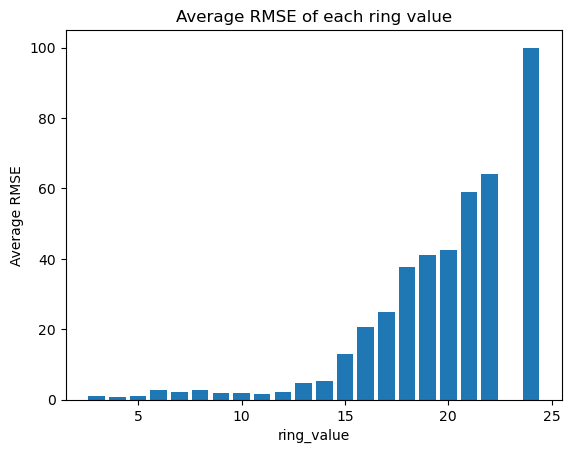

In [68]:
#Plot a bar graph for average ring RMSE for every ring value
plt.bar([ring_val for ring_val in y_test.unique()],mean_errors)
plt.xlabel("ring_value")
plt.ylabel("Average RMSE")
plt.title("Average RMSE of each ring value")

From the bar graph above, we can see that as ring values increase from 0 to 25, there is an increase in average error. In particular, ring values from 20 to 25 have substantially higher errors. 

This can be accounted for when we plot the distribuution of ring values for the training set as below:

<AxesSubplot:xlabel='rings', ylabel='count'>

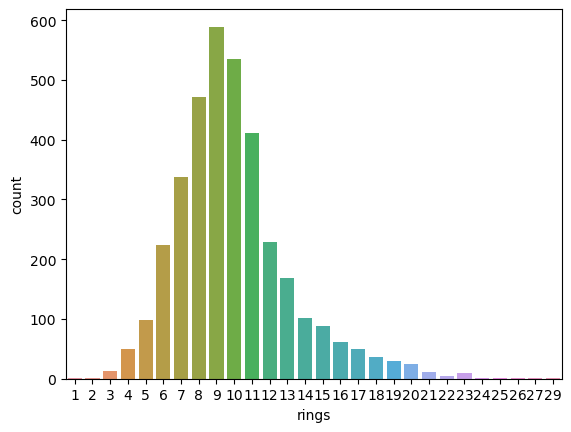

In [69]:
sns.countplot(x = y_train)

We can see that for the training set, there is a much smaller number of instances with ring value = 20 to 29. Consequently, this has resulted in a greater error for ring value > 20 as seen in the first plot due to the model not having enough instances  to accurately learn and predict ring numbers > 20.

## 3.5 Bagging Regressor

In this section, we will train a bagging regressor on the complete abalone training set and compare its performance to the random forest regressor. This bagging regressor will use 500 support vector machine regressors as base estimators. We will use the same hyperparameter values for max_features, max_samples, and bootstrap as the random forest regressor. However the SVR hyperparameters will be manually tuned.

As SVM's are sensitive to hyperparameter changes, it is important to fine tune their values. In the code below, we will test out multiple values for the hyperparameters C report their RMSE for ring prediction.

In [ ]:
for i in [0.1,1, 10,100,1000]:
    bag_reg = BaggingRegressor(estimator=SVR(C=i), n_estimators=500, random_state=123, max_features = 3, 
                               max_samples = 1000, bootstrap=True)
    bag_reg.fit(X_train_scaled,y_train)
    bag_reg_pred = np.round(bag_reg.predict(X_test_scaled))
    print("Bagging Regressor Mean Squared Error for C = " + str(i))
    print(mean_squared_error(squared = False, y_true = y_test, y_pred = bag_reg_pred))

As mentioned in part 2, section 3.3, C determines the trade off between minimising margin violations and the minimising the margin size. If C is too high, the margin will be small, however margin violations may be bigger and vice versa. In the case of the results above, we decide a value of 100 for C should be optimal as it is not too high or too low relative to the values tested.  Furthermore, its RMSE only differs by ~0.01 when compared to the smallest RMSE for ring value prediction achieved when C = 1000.

<br> Next, we will test out multiple values for the hyperparameter gamma report their RMSE for ring prediction.

In [ ]:
for i in [0.001, 0.01,0.1,1,10]:
    bag_reg = BaggingRegressor(estimator=SVR(gamma=i), n_estimators=500, random_state=123, max_features = 3, 
                               max_samples = 1000, bootstrap=True)
    bag_reg.fit(X_train_scaled,y_train)
    bag_reg_pred = np.round(bag_reg.predict(X_test_scaled))
    print("Bagging Regressor Mean Squared Error for gamma = " + str(i))
    print(mean_squared_error(squared = False, y_true = y_test, y_pred = bag_reg_pred))

As mentioned in part 2, section 3.3, gamma controls the influence of instances on the decision boundary. Higher values of gamma will result in a more complex boundary, risking overfitting, while smaller values in gamma will result in a less complex decision boundary, risking underfitting. From the results above, we decide that a value of 1 for gamma will be optimal. It achieves the smallest RMSE in ring value of 2.7, and as it is not too high or too low, we can minimise chances of under and over fitting.

Using the values for C and gamma determined above, we now will train and evaluate the performance of the bagging regressor on the abalone dataset:

In [ ]:
bag_reg = BaggingRegressor(estimator=SVR(gamma=1,C=100), n_estimators=500, random_state=123, max_features = 3, 
                               max_samples = 1000, bootstrap=True)
bag_reg.fit(X_train_scaled,y_train)
bag_reg_pred = np.round(bag_reg.predict(X_test_scaled))
print("Bagging Regressor Mean Squared Error")
print(mean_squared_error(squared = False, y_true = y_test, y_pred = bag_reg_pred))

We can also plot a graph of the predicted ring values versus the ground truth ring values of all the test instances to see the distribution of the predictions. The line y=x has been grahphed as a reference to where predicted values = true values.

In [ ]:
plt.scatter(y_test,bag_reg_pred,color="orange")
plt.plot([i for i in range(0,25)],[i for i in range(0,25)],label="predicted = true")
plt.xlabel("True Values(Rings)")
plt.ylabel("Predicted Values(Rings)")
plt.title("Bagging Regressor \n True Ring values vs Predicted Ring Values")
plt.legend()

From the plot above, we can see that as the (true) Ring value gets bigger, there is a larger proportion of instances which are incorrect. Furthermore, the distances these instances stray away from the line y=x where predicted values = True values increases. This is as expected, as from section 3.4.2, we found that there is a lower proportion of ring values for 20-25 in the training set. As such, there are not enough instances for the bagging regressor to accuractely predict ring values > 20.

When comparing the bagging regressor performance to the random forest, we can see that the random forest performs better, yielding a RMSE of 2.05 in ring value compared to the bagging forest's RMSE of 2.15 in ring value on the testing set. Furthermore, one thing that can be noted is that the bagging  regressor took more computational time compared to the random forest. This could possibly be due to model complexity. Therefore, possibly implementing stronger restrictions to the bagging regressor may improve computation time, as well as possibly improve model performance if the model is overfitting due to complexity.